# COMP 3610 Project

### A PREDICTIVE MODEL FOR ELECTORAL OUTCOMES IN TRINIDAD & TOBAGO USING MACROECONOMIC INDICATORS

- Christophe Gittens  
- Maia Neptune       
- Zidane Timothy     

In [ ]:
# initialize Program
# %pip install requests beautifulsoup4 python-csv
# %pip install pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os
import requests
from bs4 import BeautifulSoup

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
csvs_path = "csvs"

# Loading the datasets

## Electoral Data

Electoral data was sourced from the [Elections and Boundaries Commission](https://ebctt.com) and collated into a single excel file and subsequently processed in the election_results.ipynb Jupyter notebook.

* Election data encompases the 41 constituinces that were redistricted in 2007


### Elections used in our predictive models -->

 - 2007
 - 2010
 - 2015
 - 2020

In [2]:
election_results = pd.read_excel('csvs/collated-tt-election-results.xlsx', sheet_name=['2007', '2010', '2015', '2020', '2025_ACTUAL'], skiprows=[0,1,2,3,4])

# headers = 
# Access individual sheets using sheet names
sheet_1 = election_results['2007']
sheet_2 = election_results['2010']
sheet_3 = election_results['2015']
sheet_4 = election_results['2020']
sheet_5 = election_results['2025_ACTUAL']  # blank sheet for 2025 with electorate data

2015

Sourcing macroeconomic data from the World Bank API. 
We will examine the the impact of the following:
Trinidad and Tobago's Debt to GDP ratio.
Trinidad and Tobago's GDP.
Trinidad and Tobago's Inflation.
Trinidad and Tobago's Government Expenditure
Trinidad and Tobago's Unemployment Rate. 

### Debt to GDP
Source: [worldbank](api.worldbank.org) and the [CBTT](https://www.central-bank.org.tt/statistics/data-centre)

In [3]:
cols = ["Date", "Central Government Domestic Debt to GDP Ratio (%)",
        "Central Government External Debt to GDP Ratio (%)",
        "Central Government Total Debt to GDP Ratio (%)",
        "Contingent Liabilities Debt to GDP Ratio (%)",
        "Gross Public Sector Debt to GDP Ratio (%)", 
        "Net Public Sector Debt to GDP Ratio (%)"
        ]
df_debt_annual = pd.read_csv(r'csvs/Debt Annual  Central Bank of Trinidad and Tobago.csv',
                             usecols = cols, low_memory = True)
df_debt_annual

,Date,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%)
0,2024,40.1,19.3,59.4,n.d,n.d,n.d
1,2023,40.6,18.5,59.1,n.d,n.d,n.d
2,2022,41.5,18.3,59.8,n.d,n.d,n.d
3,2021,42.0,17.5,59.4,n.d,n.d,n.d
4,2020,44.0,20.0,64.0,20.6,83.9,76.7
5,2019,44.1,18.7,62.8,21.0,83.4,73.2
6,2018,42.9,16.4,59.3,18.4,77.0,61.3
7,2017,41.7,14.8,56.5,17.8,73.6,58.5
8,2016,42.2,13.4,55.6,19.0,74.7,54.9
9,2015,40.1,8.8,48.8,19.2,68.2,47.8


In [4]:
# url = 'https://api.worldbank.org/v2/country/TT/indicator/GC.XPN.TOTL.GD.ZS?format=json'
# response = requests.get(url)

# if response:
#     data = response.json()
#     tt_debt = data[1]
#     df = pd.DataFrame(tt_debt)
#     df.to_csv(os.path.join(csvs_path,r'tt_debt_to_gdp.csv'))

# else:
#     print("Response is not 200.")

### GDP
Source: [Worldbank](api.worldbank.org)

In [5]:
# url = 'https://api.worldbank.org/v2/country/TT/indicator/NY.GDP.MKTP.CD?format=json'
# response = requests.get(url)

# if response:
#     data = response.json()
#     tt_gdp = data[1]
#     df_gdp = pd.DataFrame(tt_gdp)
#     df_gdp.to_csv(os.path.join(csvs_path,r'tt_gdp.csv'))

# else:
#     print("Response is not 200.")

### Inflation
Source: [worldbank](api.worldbank.org) and the [CBTT](https://www.central-bank.org.tt/statistics/data-centre)

In [6]:
cols = ["Date", "Date",
        "Annual Average Percent Change in the Index of Retail Prices - Inflation Rate (%)",
        "Unemployment Rate (%)","WTI Crude Oil Price (US$/bbl)",
        "Henry Hub Natural Gas Price (US$/mmbtu)",
        "Net Official Reserves (US$Mn)"
        ]
df_inflation_annual = pd.read_csv(r'csvs/Selected Economic Indicators Annual  Central Bank of Trinidad and Tobago.csv',
                             usecols = cols, low_memory = True)

In [7]:
url = 'https://api.worldbank.org/v2/country/TT/indicator/FP.CPI.TOTL.ZG?format=json'
response = requests.get(url)

if response:
    data = response.json()
    tt_inflation = data[1]
    df_inflation = pd.DataFrame(tt_inflation)
    df_inflation.to_csv(os.path.join(csvs_path,r'tt_inflation.csv'))

else:
    print("Response is not 200 for inflation.")


### Unemployment rate
Source:  [worldbank](api.worldbank.org)

In [8]:
cols = ["Date", "Unemployment Rate (%)"
        ]
tt_unemployment = pd.read_csv(r'csvs/Selected Economic Indicators Annual  Central Bank of Trinidad and Tobago.csv',
                             usecols = cols, low_memory = True)

In [9]:
url = 'https://api.worldbank.org/v2/country/TT/indicator/SL.UEM.TOTL.ZS?format=json'
response = requests.get(url)

if response:
    data = response.json()
    tt_unemployment = data[1]
    df = pd.DataFrame(tt_unemployment)
    df.to_csv(os.path.join(csvs_path,r'tt_unemployment_rate.csv'))

else:
    print("Response is not 200.")

### Government expenditure

Source: [worldbank](api.worldbank.org) and [CBTT](https://www.central-bank.org.tt/statistics/data-centre)

In [10]:
df_expenditure = pd.read_csv("csvs/Public Finance Annual  Central Bank of Trinidad and Tobago.csv")

In [11]:
url = 'https://api.worldbank.org/v2/country/TT/indicator/GC.XPN.TOTL.GD.ZS?format=json'
response = requests.get(url)

if response:
    data = response.json()
    tt_expenditure = data[1]
    df_expenditure = pd.DataFrame(tt_expenditure)
    df_expenditure.to_csv(os.path.join(csvs_path,r'tt_gov_expenditure.csv'))

else:
    print("Response is not 200.")

### Homicide rate
Source: Web-Scraping from [macrotrends](macrotrends.net)

In [12]:
url ='https://www.macrotrends.net/global-metrics/countries/TTO/trinidad-and-tobago/murder-homicide-rate'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response:
    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'class': 'col-xs-6'})
    crime_data =[]
    if div:
        table = div.find_all('table', {'class':'historical_data_table table table-striped table-bordered'})
        table = table[0]
        if table:
            for row in table.find_all('tr')[2:]:
                cells = row.find_all('td')
                if len(cells) == 3:
                    year = cells[0].get_text(strip=True)
                    rate_per_100k = cells[1].get_text(strip=True)
                    annual_change = cells[2].get_text(strip=True)
                    crime_data.append([year,rate_per_100k,annual_change])

            df_homicide_rate = pd.DataFrame(crime_data, columns=['Year','Rate_per_100k_Population','Annual_change'])

            df_homicide_rate.to_csv(os.path.join(csvs_path,r'tt_homicide_rate.csv'), index=False)
else:
    print('Response is not 200.')

### Migration Rates
Source: Web-Scraping from [macrotrends](macrotrends.net) <br>
UPDATE: Page structure changes as of 5/7/2025. The following code will not work.

In [13]:
url = "https://www.macrotrends.net/global-metrics/countries/TTO/trinidad-and-tobago/net-migration#:~:text=The%20net%20migration%20rate%20for,a%200.35%25%20decline%20from%202022."
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    #print(soup.prettify())  # Check page structure
    tables = soup.find_all("table")
else:
    print("Failed to fetch page:", response.status_code)



# ensure there are at least 2 tables before accessing the second one
if len(tables) >= 2:
        second_table = tables[1]  # Get the second table
        df_migration_rate = pd.read_html(str(second_table))[0]
        df_migration_rate.columns = ["Year", "Net Migration Rate", "Growth Rate"]
        print(df_migration_rate)
        df_migration_rate.to_csv(os.path.join(csvs_path, r'tt_migration_rate.csv'), index=False)
else:
    print("Second table not found!")



Second table not found!


### Currency Exchange Rate
Source: [CBTT](https://www.central-bank.org.tt/statistics/data-centre)

In [14]:
df_exchange_rate = pd.read_csv("csvs/Exchange Rates Annual  Central Bank of Trinidad and Tobago (1).csv")
df_exchange_rate

,Date,Yen Buying,Yen Selling,US Buying,US Selling,Barbados Buying Rate,Barbados Selling Rate,Canadian Buying Rate,Canadian Selling Rate,Swiss Franc Buying Rate,Swiss Franc Selling Rate,EC Buying,EC Selling,Euro Buying,Euro Selling,Pound Buying,Pound Selling,Guyanese Buying,Guyanese Selling
0,2020,0.0630,0.0666,6.7204,6.7803,3.0145,3.5265,5.0261,5.3627,7.1418,7.4692,2.4017,2.6083,7.7617,8.2307,8.6183,9.2182,0.0308,0.0320
1,2019,0.0617,0.0653,6.7306,6.7800,2.9722,3.5199,5.0538,5.3813,6.6645,7.0753,2.4026,2.6062,7.5445,8.0224,8.5342,9.1294,0.0310,0.0321
2,2018,0.0609,0.0642,6.7321,6.7813,3.0253,3.5200,5.1438,5.4918,6.7467,7.2125,2.4105,2.6081,7.9261,8.4500,8.9231,9.5572,0.0311,0.0323
3,2017,0.0599,0.0628,6.7283,6.7795,3.2014,3.5195,5.1182,5.4517,6.6230,7.1055,2.4061,2.6132,7.5373,8.0093,8.6071,9.1537,0.0314,0.0326
4,2016,0.0632,0.0642,6.6152,6.6715,3.1694,3.4586,4.9425,5.2478,6.5403,6.9633,2.3779,2.5788,7.2682,7.6602,8.8462,9.4051,0.0314,0.0327
5,2015,0.0522,0.0546,6.3298,6.3776,3.0357,3.2837,4.8932,5.1793,6.4836,6.8578,2.2653,2.4485,6.9171,7.3032,9.5120,10.0569,0.0301,0.0312
6,2014,0.0602,0.0607,6.3613,6.4086,2.7995,3.2776,5.6779,5.9750,6.7732,7.2603,2.2761,2.4384,8.2714,8.6831,10.2525,10.7882,0.0303,0.0314
7,2013,0.0656,0.0662,6.3885,6.4426,2.7352,3.2935,6.1134,6.4166,6.7316,7.1737,2.2886,2.4468,8.2916,8.6617,9.7838,10.2313,0.0306,0.0329
8,2012,0.0799,0.0807,6.3716,6.4349,2.7123,3.2917,6.2971,6.5787,6.6408,7.0760,2.2977,2.4425,8.0181,8.3414,9.8817,10.3595,0.0306,0.0319
9,2011,0.0800,0.0807,6.3731,6.4261,2.7422,3.2816,6.3605,6.6262,7.1226,7.4970,2.2925,2.4321,8.6736,9.0375,9.9974,10.4562,0.0308,0.0320


# Preprocessing

From the central bank website n.d. is No Data or NA so that is taken in consideration moving forward. 

#### Preprocessing of electoral data

In [15]:
sheet_1

,Unnamed: 0,Unnamed: 1,VOTES CAST,Unnamed: 3,Unnamed: 4,POLLED,VOTES,%,VOTES.1,%.1,VOTES.2,%.2,VOTES.3,%.3,VOTES.4,%.4,VOTES.5,%.5
0,ARIMA,22845,13464,0.589363,91,13373,8603,0.643311,1224,0.091528,3464,0.259029,NaN,NaN,NaN,NaN,82.0,0.006132
1,AROUCA/MALONEY,23673,15948,0.673679,40,15908,12055,0.757795,1480,0.093035,2373,0.149170,NaN,NaN,NaN,NaN,NaN,NaN
2,BARATARIA/SAN JUAN,24597,16451,0.668821,93,16358,7179,0.438868,5362,0.327791,3817,0.233341,NaN,NaN,NaN,NaN,NaN,NaN
3,CARONI CENTRAL,22813,16640,0.729409,46,16594,4579,0.275943,7615,0.458901,4400,0.265156,NaN,NaN,NaN,NaN,NaN,NaN
4,CARONI EAST,23554,16460,0.698820,64,16396,3833,0.233777,8333,0.508234,4230,0.257990,NaN,NaN,NaN,NaN,NaN,NaN
5,CHAGUANAS EAST,22383,15887,0.709780,51,15836,6757,0.426686,4993,0.315294,4086,0.258020,NaN,NaN,NaN,NaN,NaN,NaN
6,CHAGUANAS WEST,24272,18029,0.742790,82,17947,1519,0.084638,11150,0.621274,5278,0.294088,NaN,NaN,NaN,NaN,NaN,NaN
7,COUVA NORTH,25898,18992,0.733338,72,18920,5249,0.277431,8832,0.466808,4839,0.255761,NaN,NaN,NaN,NaN,NaN,NaN
8,COUVA SOUTH,25188,17987,0.714110,53,17934,5097,0.284209,8428,0.469945,4409,0.245846,NaN,NaN,NaN,NaN,NaN,NaN
9,CUMUTO/MANZANILLA,24700,17751,0.718664,76,17675,7124,0.403055,7368,0.416860,3183,0.180085,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sheet_1.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
VOTES CAST     0
Unnamed: 3     0
Unnamed: 4     0
POLLED         0
VOTES          0
%              0
VOTES.1        0
%.1            0
VOTES.2        0
%.2            0
VOTES.3       39
%.3           39
VOTES.4       39
%.4           39
VOTES.5       37
%.5           37
dtype: int64

In [17]:
# sht_07, sht_10, sht_15, sht_20 = sheet_2007.iloc[3:], sheet_2010.iloc[3:], sheet_2015.iloc[3:], sheet_2020.iloc[3:]

# print(sht_07)
# print(sht_10)
# print(sht_15)
# print(sht_20)
# sht_20

In [18]:
sheet_1.shape

(42, 18)

Fixing headers

### 2007 Parliamentary Election

In [19]:
cols= [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'D.A.C._VOTES', 'D.A.C._VOTES_%', 'D.N.A._VOTES', 
            'D.N.A._VOTES_%', 'I.N.D_VOTES', 'I.N.D._VOTES_%'
        ]
sht_07 = sheet_1
sht_07.columns = cols
sht_07.fillna(0, inplace=True)
sht_07

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,C.O.P._VOTES,C.O.P._VOTES_%,D.A.C._VOTES,D.A.C._VOTES_%,D.N.A._VOTES,D.N.A._VOTES_%,I.N.D_VOTES,I.N.D._VOTES_%
0,ARIMA,22845,13464,0.589363,91,13373,8603,0.643311,1224,0.091528,3464,0.259029,0.0,0.000000,0.0,0.000000,82.0,0.006132
1,AROUCA/MALONEY,23673,15948,0.673679,40,15908,12055,0.757795,1480,0.093035,2373,0.149170,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,24597,16451,0.668821,93,16358,7179,0.438868,5362,0.327791,3817,0.233341,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,22813,16640,0.729409,46,16594,4579,0.275943,7615,0.458901,4400,0.265156,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,23554,16460,0.698820,64,16396,3833,0.233777,8333,0.508234,4230,0.257990,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,22383,15887,0.709780,51,15836,6757,0.426686,4993,0.315294,4086,0.258020,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,24272,18029,0.742790,82,17947,1519,0.084638,11150,0.621274,5278,0.294088,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,25898,18992,0.733338,72,18920,5249,0.277431,8832,0.466808,4839,0.255761,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,25188,17987,0.714110,53,17934,5097,0.284209,8428,0.469945,4409,0.245846,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,24700,17751,0.718664,76,17675,7124,0.403055,7368,0.416860,3183,0.180085,0.0,0.000000,0.0,0.000000,0.0,0.000000


### 2010 Parliamentary Election

In [20]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'N.N.V._VOTES', 'N.N.V._VOTES_%', 'T.O.P._VOTES', 
            'T.O.P._VOTES_%', 'T.H.C._VOTES', 'T.H.C._VOTES_%', 'I.N.D_VOTES', 
            'I.N.D._VOTES_%', 'T.T.N.C.P._VOTES', 'T.T.N.C.P._VOTES_%'
        ]

sht_10 = sheet_2
sht_10.columns = cols
sht_10.fillna(0, inplace=True)
sht_10

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,N.N.V._VOTES,N.N.V._VOTES_%,T.O.P._VOTES,T.O.P._VOTES_%,T.H.C._VOTES,T.H.C._VOTES_%,I.N.D_VOTES,I.N.D._VOTES_%,T.T.N.C.P._VOTES,T.T.N.C.P._VOTES_%
0,ARIMA,24115,15130,0.627410,73,15057,7246,0.481238,7610,0.505413,...,201.0,0.013349,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,25019,17196,0.687318,46,17150,11517,0.671545,5520,0.321866,...,0.0,0.000000,0.0,0.0,0.0,0.000000,113.0,0.006589,0.0,0.000000
2,BARATARIA/SAN JUAN,25394,17768,0.699693,76,17692,6742,0.381076,10950,0.618924,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,24601,18793,0.763912,50,18743,4880,0.260364,13863,0.739636,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,25166,18762,0.745530,57,18705,3724,0.199091,14981,0.800909,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,23653,17611,0.744557,58,17553,6717,0.382670,10797,0.615109,...,39.0,0.002222,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,25715,20281,0.788684,70,20211,1471,0.072782,18740,0.927218,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,27680,21286,0.769003,70,21216,5159,0.243166,16057,0.756834,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,26400,19877,0.752917,59,19818,4773,0.240842,15045,0.759158,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,26896,20527,0.763199,121,20406,7181,0.351906,13116,0.642752,...,0.0,0.000000,0.0,0.0,0.0,0.000000,109.0,0.005342,0.0,0.000000


### 2015 Parliamentary Election

In [21]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'I.L.P._VOTES', 'I.L.P._VOTES_%', 'N.J.A.C._VOTES',
            'N.J.A.C._VOTES_%','D.D.P._VOTES', 'D.D.P._VOTES_%', 'I.D.P._VOTES',
            'I.D.P._VOTES_%', 'I.N.D_VOTES', 'I.N.D._VOTES_%', 'L.O.V.E._VOTES',
            'L.O.V.E._VOTES_%', 'N.C.T._VOTES', 'N.C.T._VOTES_%','N.N.V._VOTES',
            'N.N.V._VOTES_%','T.F._VOTES', 'T.F._VOTES_%', 'T.O.P._VOTES', 
            'T.O.P._VOTES_%', 'T.H.C._VOTES', 'T.H.C._VOTES_%', 'T.N.V._VOTES',
            'T.N.V._VOTES_%', 'T.P.T._VOTES', 'T.P.T._VOTES_%', 'Y.E.P._VOTES', 
            'Y.E.P._VOTES_%', 'Y.O.U.R._VOTES', 'Y.O.U.R._VOTES_%',
        ]
sht_15 = sheet_3
sht_15.columns = cols
sht_15.fillna(0, inplace=True)
sht_15

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,T.H.C._VOTES,T.H.C._VOTES_%,T.N.V._VOTES,T.N.V._VOTES_%,T.P.T._VOTES,T.P.T._VOTES_%,Y.E.P._VOTES,Y.E.P._VOTES_%,Y.O.U.R._VOTES,Y.O.U.R._VOTES_%
0,ARIMA,25555,15761,0.616748,56,15705,10879,0.695200,4578,0.292500,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,26321,18250,0.693363,50,18200,14843,0.815500,3357,0.184500,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,25529,16970,0.664734,32,16938,8182,0.483056,8722,0.514937,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,34.0,0.002007,0.0,0.000000
3,CARONI CENTRAL,27887,19731,0.707534,37,19694,7206,0.365898,12349,0.627044,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,27602,18863,0.683393,41,18822,5095,0.270694,13525,0.718574,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,25488,17942,0.703939,27,17915,7860,0.438738,9284,0.518225,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,27704,20179,0.728379,65,20114,2190,0.108879,17506,0.870339,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,29284,20816,0.710832,46,20770,6749,0.324940,13845,0.666586,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,28499,20186,0.708306,50,20136,6070,0.301450,13889,0.689760,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,28152,20004,0.710571,75,19929,8282,0.415575,11461,0.575092,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


### 2020 Parliamentary Election

In [22]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%','P.E.P._VOTES', 
            'P.E.P._VOTES_%', 'C.O.P._VOTES', 'C.O.P._VOTES_%', 'I.L.P._VOTES', 
            'I.L.P._VOTES_%', 'D.P.T._VOTES', 'D.P.T._VOTES_%', 'I.N.D_VOTES', 
            'I.N.D._VOTES_%','M.N.D._VOTES', 'M.N.D._VOTES_%', 'M.S.J._VOTES',
            'M.S.J._VOTES_%', 'N.C.T._VOTES', 'N.C.T._VOTES_%','N.N.V._VOTES',
            'N.N.V._VOTES_%','N.O.W._VOTES', 'N.O.W._VOTES_%', 'O.T.V._VOTES', 
            'O.T.V._VOTES_%', 'P.D.P._VOTES', 'P.D.P._VOTES_%', 'P.P._VOTES', 
            'P.P._VOTES_%', 'T.D.F._VOTES', 'T.D.F._VOTES_%', 'T.H.C._VOTES', 
            'T.H.C._VOTES_%', 'T.N.P._VOTES', 'T.N.P._VOTES_%', 'U.P.P._VOTES', 
            'U.P.P._VOTES_%', 'U.T.P._VOTES', 'U.T.P._VOTES_%'
        ]
sht_20 = sheet_4
sht_20.columns = cols
sht_20.fillna(0, inplace=True)
sht_20

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,T.D.F._VOTES,T.D.F._VOTES_%,T.H.C._VOTES,T.H.C._VOTES_%,T.N.P._VOTES,T.N.P._VOTES_%,U.P.P._VOTES,U.P.P._VOTES_%,U.T.P._VOTES,U.T.P._VOTES_%
0,ARIMA,26382,13488,0.511258,30,13458,9293,0.695200,3858,0.286670,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,26673,15522,0.581937,57,15465,12697,0.815500,2768,0.178985,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,25690,15771,0.613896,27,15744,7240,0.459858,8300,0.527185,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,30107,18677,0.620354,31,18646,6890,0.369516,11511,0.617344,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,29031,17416,0.599910,30,17386,4271,0.245657,12819,0.737317,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,26923,17125,0.636073,53,17072,7882,0.461692,8968,0.525305,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,28625,17566,0.613659,48,17518,1878,0.107204,15502,0.884918,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,29864,18238,0.610702,25,18213,5222,0.286718,12633,0.693625,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,30348,18281,0.602379,36,18245,5542,0.303754,12597,0.690436,...,0.0,0.000000,106.0,0.005810,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,30468,18702,0.613824,51,18651,7557,0.405179,10901,0.584473,...,0.0,0.000000,35.0,0.001877,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [23]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%','P.E.P._VOTES', 
            'P.E.P._VOTES_%', 'C.O.P._VOTES', 'C.O.P._VOTES_%', 'I.L.P._VOTES', 
            'I.L.P._VOTES_%', 'D.P.T._VOTES', 'D.P.T._VOTES_%', 'I.N.D_VOTES', 
            'I.N.D._VOTES_%','M.N.D._VOTES', 'M.N.D._VOTES_%', 'M.S.J._VOTES',
            'M.S.J._VOTES_%', 'N.C.T._VOTES', 'N.C.T._VOTES_%','N.N.V._VOTES',
            'N.N.V._VOTES_%','N.O.W._VOTES', 'N.O.W._VOTES_%', 'O.T.V._VOTES', 
            'O.T.V._VOTES_%', 'P.D.P._VOTES', 'P.D.P._VOTES_%', 'P.P._VOTES', 
            'P.P._VOTES_%', 'T.D.F._VOTES', 'T.D.F._VOTES_%', 'T.H.C._VOTES', 
            'T.H.C._VOTES_%', 'T.N.P._VOTES', 'T.N.P._VOTES_%', 'U.P.P._VOTES', 
            'U.P.P._VOTES_%', 'U.T.P._VOTES', 'U.T.P._VOTES_%'
        ]
sht_25 = sheet_5.copy()
sht_25.columns = cols
sht_25.fillna(0, inplace=True)

# Display the updated DataFrame
sht_25

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,T.D.F._VOTES,T.D.F._VOTES_%,T.H.C._VOTES,T.H.C._VOTES_%,T.N.P._VOTES,T.N.P._VOTES_%,U.P.P._VOTES,U.P.P._VOTES_%,U.T.P._VOTES,U.T.P._VOTES_%
0,ARIMA,28802,14167,0.49190,46,14121,7055,0.499611,6356,0.450110,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,28953,15350,0.53020,62,15288,9858,0.644819,4443,0.290620,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,25183,14164,0.56240,36,14128,4742,0.335646,8887,0.629035,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,31460,18477,0.58730,46,18431,4854,0.263361,12663,0.687049,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,30208,17315,0.57320,40,17275,2757,0.159595,13957,0.807931,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,27728,16110,0.58100,37,16073,5317,0.330803,10097,0.628196,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,47.0,0.002917
6,CHAGUANAS WEST,29043,18046,0.62140,44,18002,1390,0.077214,16013,0.889512,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,30681,18064,0.58880,42,18022,3094,0.171679,13201,0.732494,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,30975,17881,0.57730,41,17840,3763,0.210930,13122,0.735538,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,30776,18447,0.59940,57,18390,5393,0.293257,12559,0.682926,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


## Debt to GDP cleaning

In [24]:
df_debt_annual

,Date,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%)
0,2024,40.1,19.3,59.4,n.d,n.d,n.d
1,2023,40.6,18.5,59.1,n.d,n.d,n.d
2,2022,41.5,18.3,59.8,n.d,n.d,n.d
3,2021,42.0,17.5,59.4,n.d,n.d,n.d
4,2020,44.0,20.0,64.0,20.6,83.9,76.7
5,2019,44.1,18.7,62.8,21.0,83.4,73.2
6,2018,42.9,16.4,59.3,18.4,77.0,61.3
7,2017,41.7,14.8,56.5,17.8,73.6,58.5
8,2016,42.2,13.4,55.6,19.0,74.7,54.9
9,2015,40.1,8.8,48.8,19.2,68.2,47.8


In [25]:
df_debt_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               25 non-null     int64  
 1   Central Government Domestic Debt to GDP Ratio (%)  25 non-null     float64
 2   Central Government External Debt to GDP Ratio (%)  25 non-null     float64
 3   Central Government Total Debt to GDP Ratio (%)     25 non-null     float64
 4   Contingent Liabilities Debt to GDP Ratio (%)       25 non-null     object 
 5   Gross Public Sector Debt to GDP Ratio (%)          25 non-null     object 
 6   Net Public Sector Debt to GDP Ratio (%)            25 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


In [26]:
df_debt_annual["Date"] = df_debt_annual["Date"].astype("int64")
df_debt_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               25 non-null     int64  
 1   Central Government Domestic Debt to GDP Ratio (%)  25 non-null     float64
 2   Central Government External Debt to GDP Ratio (%)  25 non-null     float64
 3   Central Government Total Debt to GDP Ratio (%)     25 non-null     float64
 4   Contingent Liabilities Debt to GDP Ratio (%)       25 non-null     object 
 5   Gross Public Sector Debt to GDP Ratio (%)          25 non-null     object 
 6   Net Public Sector Debt to GDP Ratio (%)            25 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


In [27]:
# Replace String values with numeric values and convert to float
df_debt_annual[["Contingent Liabilities Debt to GDP Ratio (%)",
                "Gross Public Sector Debt to GDP Ratio (%)",
                "Net Public Sector Debt to GDP Ratio (%)"]] = df_debt_annual[["Contingent Liabilities Debt to GDP Ratio (%)",
                "Gross Public Sector Debt to GDP Ratio (%)",
                "Net Public Sector Debt to GDP Ratio (%)"]].replace("n.d",0)

df_debt_annual[["Contingent Liabilities Debt to GDP Ratio (%)",
                "Gross Public Sector Debt to GDP Ratio (%)",
                "Net Public Sector Debt to GDP Ratio (%)"]] = df_debt_annual[["Contingent Liabilities Debt to GDP Ratio (%)",
                "Gross Public Sector Debt to GDP Ratio (%)",
                "Net Public Sector Debt to GDP Ratio (%)"]].astype(float)

In [28]:
df_debt_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               25 non-null     int64  
 1   Central Government Domestic Debt to GDP Ratio (%)  25 non-null     float64
 2   Central Government External Debt to GDP Ratio (%)  25 non-null     float64
 3   Central Government Total Debt to GDP Ratio (%)     25 non-null     float64
 4   Contingent Liabilities Debt to GDP Ratio (%)       25 non-null     float64
 5   Gross Public Sector Debt to GDP Ratio (%)          25 non-null     float64
 6   Net Public Sector Debt to GDP Ratio (%)            25 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.5 KB


In [29]:
df_debt_annual.describe()

,Date,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%)
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2012.000000,31.180000,12.628000,43.792000,7.968000,29.260000,22.508000
std,7.359801,9.923667,5.671752,13.722303,9.245482,34.792983,27.686427
min,2000.000000,16.800000,5.300000,23.400000,0.000000,0.000000,0.000000
25%,2006.000000,23.000000,7.300000,34.300000,0.000000,0.000000,0.000000
50%,2012.000000,28.600000,13.400000,43.300000,0.000000,0.000000,0.000000
75%,2018.000000,41.500000,18.300000,59.100000,17.800000,66.500000,45.200000
max,2024.000000,44.100000,21.500000,64.000000,21.000000,83.900000,76.700000


In [30]:
df_debt_annual.isna().sum()

Date                                                 0
Central Government Domestic Debt to GDP Ratio (%)    0
Central Government External Debt to GDP Ratio (%)    0
Central Government Total Debt to GDP Ratio (%)       0
Contingent Liabilities Debt to GDP Ratio (%)         0
Gross Public Sector Debt to GDP Ratio (%)            0
Net Public Sector Debt to GDP Ratio (%)              0
dtype: int64

In [31]:
df_debt_annual.isna().any()

Date                                                 False
Central Government Domestic Debt to GDP Ratio (%)    False
Central Government External Debt to GDP Ratio (%)    False
Central Government Total Debt to GDP Ratio (%)       False
Contingent Liabilities Debt to GDP Ratio (%)         False
Gross Public Sector Debt to GDP Ratio (%)            False
Net Public Sector Debt to GDP Ratio (%)              False
dtype: bool

The data for debt to gdp looks cleaned enough. 

## GDP

Soure: [CSO](https://cso.gov.tt/subjects/national-accounts/)

In [32]:
df_gdp = pd.read_csv("csvs/tt_gdp.csv")

In [33]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       51 non-null     int64  
 1   indicator        51 non-null     object 
 2   country          51 non-null     object 
 3   countryiso3code  51 non-null     object 
 4   date             51 non-null     int64  
 5   value            51 non-null     float64
 6   unit             0 non-null      float64
 7   obs_status       0 non-null      float64
 8   decimal          51 non-null     int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.7+ KB


In [34]:
df_gdp["date"] = df_gdp["date"].astype("int64")
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       51 non-null     int64  
 1   indicator        51 non-null     object 
 2   country          51 non-null     object 
 3   countryiso3code  51 non-null     object 
 4   date             51 non-null     int64  
 5   value            51 non-null     float64
 6   unit             0 non-null      float64
 7   obs_status       0 non-null      float64
 8   decimal          51 non-null     int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.7+ KB


In [35]:
df_gdp.isna().sum()

Unnamed: 0          0
indicator           0
country             0
countryiso3code     0
date                0
value               0
unit               51
obs_status         51
decimal             0
dtype: int64

In [36]:
df_gdp.isna().all()

Unnamed: 0         False
indicator          False
country            False
countryiso3code    False
date               False
value              False
unit                True
obs_status          True
decimal            False
dtype: bool

In [37]:
df_gdp.describe()

,Unnamed: 0,date,value,unit,obs_status,decimal
count,51.000000,51.000000,5.100000e+01,0.0,0.0,51.0
mean,25.000000,2000.000000,1.378672e+10,NaN,NaN,0.0
std,14.866069,14.866069,9.714837e+09,NaN,NaN,0.0
min,0.000000,1975.000000,2.442670e+09,NaN,NaN,0.0
25%,12.500000,1987.500000,5.318562e+09,NaN,NaN,0.0
50%,25.000000,2000.000000,8.154342e+09,NaN,NaN,0.0
75%,37.500000,2012.500000,2.390794e+10,NaN,NaN,0.0
max,50.000000,2025.000000,3.005345e+10,NaN,NaN,0.0


## Inflation

Source: [Macrotrends](https://www.macrotrends.net/global-metrics/countries/TTO/trinidad-and-tobago/inflation-rate-cpi)

In [38]:
df_inflation

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2024,0.526885,,,1
1,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2023,4.629302,,,1
2,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2022,5.828386,,,1
3,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2021,2.059227,,,1
4,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2020,0.598986,,,1
5,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2019,1.000543,,,1
6,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2018,1.018569,,,1
7,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2017,1.880384,,,1
8,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2016,3.070667,,,1
9,"{'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, ...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2015,4.661216,,,1


In [39]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        50 non-null     object 
 1   country          50 non-null     object 
 2   countryiso3code  50 non-null     object 
 3   date             50 non-null     object 
 4   value            50 non-null     float64
 5   unit             50 non-null     object 
 6   obs_status       50 non-null     object 
 7   decimal          50 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ KB


In [40]:
df_inflation["date"] = df_inflation['date'].astype("int64")
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        50 non-null     object 
 1   country          50 non-null     object 
 2   countryiso3code  50 non-null     object 
 3   date             50 non-null     int64  
 4   value            50 non-null     float64
 5   unit             50 non-null     object 
 6   obs_status       50 non-null     object 
 7   decimal          50 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ KB


In [41]:
df_inflation.isna().sum()

indicator          0
country            0
countryiso3code    0
date               0
value              0
unit               0
obs_status         0
decimal            0
dtype: int64

In [42]:
df_inflation.isna().all()

indicator          False
country            False
countryiso3code    False
date               False
value              False
unit               False
obs_status         False
decimal            False
dtype: bool

The commented code is for inflation extracted from the Central Bank of Trinidad and Tobago (CBTT) and is more concise

In [43]:
# df_inflation_annual.info()

In [44]:
# df_inflation_annual.describe()

In [45]:
# df_inflation_annual.isna().sum()

## Unemployment Values cleaning

In [46]:
df_unemployment = pd.read_csv("csvs/tt_unemployment_rate.csv")

# Convert all values in df_unemployment to more readable values
df_unemployment['value'] = df_unemployment['value'].apply(lambda x: round(x, 2))
df_unemployment.rename(columns={'value': 'Unemployment Rate (%)'}, inplace=True)
df_unemployment

,Unnamed: 0,indicator,country,countryiso3code,date,Unemployment Rate (%),unit,obs_status,decimal
0,0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2024,4.55,NaN,NaN,1
1,1,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2023,4.21,NaN,NaN,1
2,2,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2022,4.38,NaN,NaN,1
3,3,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2021,4.45,NaN,NaN,1
4,4,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2020,4.21,NaN,NaN,1
5,5,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2019,3.52,NaN,NaN,1
6,6,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2018,3.50,NaN,NaN,1
7,7,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2017,3.39,NaN,NaN,1
8,8,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2016,3.21,NaN,NaN,1
9,9,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2015,2.43,NaN,NaN,1


In [47]:
df_unemployment = df_unemployment.drop(columns={"unit", "obs_status", "decimal"})
df_unemployment

,Unnamed: 0,indicator,country,countryiso3code,date,Unemployment Rate (%)
0,0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2024,4.55
1,1,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2023,4.21
2,2,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2022,4.38
3,3,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2021,4.45
4,4,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2020,4.21
5,5,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2019,3.52
6,6,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2018,3.50
7,7,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2017,3.39
8,8,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2016,3.21
9,9,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2015,2.43


In [48]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50 non-null     int64  
 1   indicator              50 non-null     object 
 2   country                50 non-null     object 
 3   countryiso3code        50 non-null     object 
 4   date                   50 non-null     int64  
 5   Unemployment Rate (%)  34 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [49]:
df_unemployment["date"] = df_unemployment['date'].astype("int64")
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50 non-null     int64  
 1   indicator              50 non-null     object 
 2   country                50 non-null     object 
 3   countryiso3code        50 non-null     object 
 4   date                   50 non-null     int64  
 5   Unemployment Rate (%)  34 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [50]:
df_unemployment.isna().sum()

Unnamed: 0                0
indicator                 0
country                   0
countryiso3code           0
date                      0
Unemployment Rate (%)    16
dtype: int64

Since we are only looking at 2000/2002 onward we can drop all the empty rows since they are not part of our dataset

In [51]:
df_unemployment.dropna(subset=['Unemployment Rate (%)'], inplace=True)
df_unemployment.isna().sum()

Unnamed: 0               0
indicator                0
country                  0
countryiso3code          0
date                     0
Unemployment Rate (%)    0
dtype: int64

In [52]:
df_unemployment.isna().all()

Unnamed: 0               False
indicator                False
country                  False
countryiso3code          False
date                     False
Unemployment Rate (%)    False
dtype: bool

In [53]:
df_unemployment

,Unnamed: 0,indicator,country,countryiso3code,date,Unemployment Rate (%)
0,0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2024,4.55
1,1,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2023,4.21
2,2,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2022,4.38
3,3,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2021,4.45
4,4,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2020,4.21
5,5,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2019,3.52
6,6,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2018,3.50
7,7,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2017,3.39
8,8,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2016,3.21
9,9,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,2015,2.43


In [54]:
df_unemployment.describe()

,Unnamed: 0,date,Unemployment Rate (%)
count,34.000000,34.000000,34.000000
mean,16.500000,2007.500000,8.478529
std,9.958246,9.958246,5.812435
min,0.000000,1991.000000,2.430000
25%,8.250000,1999.250000,3.797500
50%,16.500000,2007.500000,5.410000
75%,24.750000,2015.750000,12.865000
max,33.000000,2024.000000,19.810000


The commented code is for inflation extractedd from the Central Bank of Trinidad and Tobago (CBTT) and is more concise

In [55]:
# df_unemployment_annual.info()

In [56]:
# df_unemployment_annual.describe()

In [57]:
# df_unemployment_annual.isna().sum()

In [58]:
# df_unemployment_annual.isna().any()

## Government Expenditure

In [59]:
df_expenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        50 non-null     object 
 1   country          50 non-null     object 
 2   countryiso3code  50 non-null     object 
 3   date             50 non-null     object 
 4   value            19 non-null     float64
 5   unit             50 non-null     object 
 6   obs_status       50 non-null     object 
 7   decimal          50 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ KB


In [60]:
df_expenditure['date'] = df_expenditure['date'].astype("int64")
df_expenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        50 non-null     object 
 1   country          50 non-null     object 
 2   countryiso3code  50 non-null     object 
 3   date             50 non-null     int64  
 4   value            19 non-null     float64
 5   unit             50 non-null     object 
 6   obs_status       50 non-null     object 
 7   decimal          50 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ KB


In [61]:
df_expenditure.isna().sum()

indicator           0
country             0
countryiso3code     0
date                0
value              31
unit                0
obs_status          0
decimal             0
dtype: int64

In [62]:
df_expenditure.isna().all()

indicator          False
country            False
countryiso3code    False
date               False
value              False
unit               False
obs_status         False
decimal            False
dtype: bool

Given the only important missing values are 2020 and 2000 expenditure values, we can source those two and drop the other rows that we are empty

## Homicide Rate

In [63]:
df_homicide_rate = pd.read_csv(r"csvs/tt_homicide_rate.csv") #rate per 100k for 2023 and 2023 sourced from statista.com others from macrotrend.com

#pct_change will make Annual_change row for first value null
df_homicide_rate['Annual_change'] = df_homicide_rate["Annual_change"].replace(to_replace=' ', value=0)
df_homicide_rate['Annual_change'] = df_homicide_rate["Annual_change"].str.rstrip('%').astype('float')
last_homicide_row = df_homicide_rate.iloc[-1:]

df_homicide_rate= df_homicide_rate.sort_values(by='Year')
df_homicide_rate['Annual_change'] = (df_homicide_rate['Rate_per_100k_Population'].pct_change()* 100).round(2) 
df_homicide_rate= df_homicide_rate.sort_values(by='Year', ascending=False)

df_homicide_rate.iloc[-1:] = last_homicide_row

df_homicide_rate

,Year,Rate_per_100k_Population,Annual_change,Total_murders_per_year
0,2024,45.70,21.54,625
1,2023,37.60,-12.96,577
2,2022,43.20,47.14,605
3,2021,29.36,11.72,450
4,2020,26.28,-25.89,399
5,2019,35.46,3.20,539
6,2018,34.36,2.63,517
7,2017,33.48,6.25,495
8,2016,31.51,9.56,462
9,2015,28.76,3.01,420


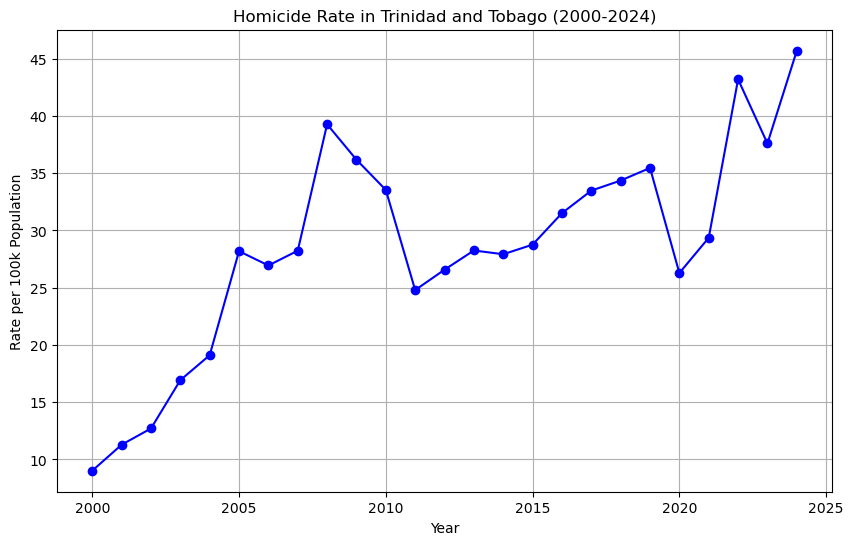

In [64]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.plot(df_homicide_rate['Year'], df_homicide_rate['Rate_per_100k_Population'], marker='o', linestyle='-', color='b', label='Homicide Rate')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rate per 100k Population')
plt.title('Homicide Rate in Trinidad and Tobago (2000-2024)')

# Show the plot
plt.grid()
plt.show()

In [65]:
df_homicide_by_div = pd.read_csv(r'csvs/tt_murders_by_division_2013_2024.csv')
df_homicide_by_div['Year'] = df_homicide_by_div['Year'].astype('int64')
df_homicide_by_div = pd.merge(df_homicide_rate, df_homicide_by_div, on='Year', how='outer')


## Constituency/Division Specific Homicide Information
Incase accuracy is low. This will be employed for the SVM. <br>
Update: This did not help

In [66]:
# #melting the df
df_long_homicide_by_div = df_homicide_by_div.melt(id_vars=['Year', 'Rate_per_100k_Population', 'Annual_change','Total_murders_per_year'], 
                  var_name='Division', 
                  value_name='Murders')

In [67]:
def murder_estimate(division, df_long):
    division_data = df_long[df_long['Division'] == division].copy()

    murders_2013 = division_data[division_data['Year'] == 2013]['Murders'].values[0]

    for year in range(2012, 1999, -1):
        try:
            pct_change = division_data[division_data['Year'] == year + 1]['Annual_change'].values[0]
        except IndexError:
            continue  

        projected_murders = (murders_2013 / (1 + pct_change / 100)).round()

        mask = (df_long['Year'] == year) & (df_long['Division'] == division)
        if df_long.loc[mask, 'Murders'].isna().any():
            df_long.loc[mask, 'Murders'] = projected_murders
        else:
            new_row = {
                'Year': year,
                'Division': division,
                'Rate_per_100k_Population': np.nan,
                'Annual_change': np.nan,
                'Murders': projected_murders,
                'Annual_change': np.nan
            }
            df_long = pd.concat([df_long, pd.DataFrame([new_row])], ignore_index=True)

        murders_2013 = projected_murders

    return df_long

In [68]:
divisions = df_long_homicide_by_div['Division'].dropna().unique()

for division in divisions:
    df_long_homicide_by_div = murder_estimate(division, df_long_homicide_by_div)

In [69]:
#testing to see if data is accurate
#quote "When murder data are restricted to 2001-2013, the
# largest proportion of murders in Trinidad and Tobago took place in the Port of Spain Division
# (26.7 per cent). This was followed by the Northern Division (19.9 per cent), North Eastern
# Division (13.3 per cent), and Western Division (12.3 per cent)."

subset = df_long_homicide_by_div[(df_long_homicide_by_div['Year'] >= 2001) & (df_long_homicide_by_div['Year'] <= 2013)]

total_by_division = subset.groupby('Division')['Murders'].sum()
grand_total = total_by_division.sum()

division_percentages = (total_by_division / grand_total) * 100
division_percentages = division_percentages.sort_values(ascending=False)
print(division_percentages)



Division
Port_of_Spain    29.576588
Northern         20.070569
North_Eastern    12.391034
Western          10.564550
Central           8.758821
Southern          8.447489
Eastern           4.586966
South_Western     4.586966
Tobago            1.017020
Name: Murders, dtype: float64


From: 1. Crime-Trinidad and Tobago. 2. Crime prevention-Trinidad and Tobago. 3. ViolenceTrinidad and Tobago. 4. Violence-Prevention-Trinidad and Tobago. I. Inter-American
Development Bank. Country Department Caribbean Group. II. Title. III. Series.
IDB-TN-1062 

"When murder data are restricted to 2001-2013, the largest proportion of murders in Trinidad and Tobago took place in the Port of Spain Division (26.7 per cent). This was followed by the Northern Division (19.9 per cent), North Eastern Division (13.3 per cent), and Western Division (12.3 per cent)."

The difference in percentage in Port-Of-Spain can be accounted for due to the 2013 murder count starting off at 122 murders and slightly dropping. 
 

## Migration Rates

In [70]:
df_migration_rate = pd.read_csv("csvs/tt_migration_rate.csv")

In [71]:
df_migration_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                76 non-null     int64  
 1   Net Migration Rate  76 non-null     float64
 2   Growth Rate         76 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [72]:
df_migration_rate['Year'] = df_migration_rate['Year'].astype('int64')
df_migration_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                76 non-null     int64  
 1   Net Migration Rate  76 non-null     float64
 2   Growth Rate         76 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [73]:
df_migration_rate["Growth Rate"] = (
    df_migration_rate["Growth Rate"]
    .str.rstrip('%')
    .astype('float')
).round(4)

df_migration_rate = df_migration_rate.rename(columns={
    "Growth Rate": "Growth Rate(in percent)",
    "Year": "Year",
    "Net Migration Rate": "Net Migration Rate"
})

df_migration_rate

,Year,Net Migration Rate,Growth Rate(in percent)
0,2025,-0.568,0.00
1,2024,-0.568,-0.18
2,2023,-0.569,-0.35
3,2022,-0.571,-0.35
4,2021,-0.573,-0.17
...,...,...,...
71,1954,-1.068,-3.17
72,1953,-1.103,-3.08
73,1952,-1.138,-2.98
74,1951,-1.173,-2.82


In [74]:
df_migration_rate.isna().sum()

Year                       0
Net Migration Rate         0
Growth Rate(in percent)    0
dtype: int64

In [75]:
df_migration_rate.isna().any()

Year                       False
Net Migration Rate         False
Growth Rate(in percent)    False
dtype: bool

In [76]:
df_migration_rate.describe()

,Year,Net Migration Rate,Growth Rate(in percent)
count,76.000000,76.000000,76.000000
mean,1987.500000,-4.712895,1.640263
std,22.083176,3.706642,32.864317
min,1950.000000,-13.205000,-43.040000
25%,1968.750000,-6.237500,-6.127500
50%,1987.500000,-5.315500,-0.430000
75%,2006.250000,-1.094250,0.750000
max,2025.000000,-0.568000,257.910000


# Putting Together Datasets for model

In [77]:
# Ensure all date/year columns are named consistently for merging
df_debt_annual.rename(columns={"Date": "Year"}, inplace=True)
df_gdp.rename(columns={"date": "Year"}, inplace=True)
df_inflation.rename(columns={"date": "Year"}, inplace=True)
df_unemployment.rename(columns={"date": "Year"}, inplace=True)
df_migration_rate.rename(columns={"Year": "Year"}, inplace=True)
df_homicide_rate.rename(columns={"Year": "Year"}, inplace=True)

# Merge all dataframes on the "Year" column
dataset = df_debt_annual.merge(df_gdp, on="Year", how="outer") \
                          .merge(df_inflation, on="Year", how="outer") \
                          .merge(df_unemployment, on="Year", how="outer") \
                          .merge(df_migration_rate, on="Year", how="outer") \
                          .merge(df_homicide_rate, on="Year", how="outer")

# Display the merged dataframe
dataset

,Year,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%),Unnamed: 0_x,indicator_x,country_x,...,Unnamed: 0_y,indicator,country,countryiso3code,Unemployment Rate (%),Net Migration Rate,Growth Rate(in percent),Rate_per_100k_Population,Annual_change,Total_murders_per_year
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.207,0.00,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.173,-2.82,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.138,-2.98,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.103,-3.08,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.068,-3.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2021,42.0,17.5,59.4,0.0,0.0,0.0,4.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,3.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,4.45,-0.573,-0.17,29.36,11.72,450.0
72,2022,41.5,18.3,59.8,0.0,0.0,0.0,3.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,2.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,4.38,-0.571,-0.35,43.20,47.14,605.0
73,2023,40.6,18.5,59.1,0.0,0.0,0.0,2.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,1.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,4.21,-0.569,-0.35,37.60,-12.96,577.0
74,2024,40.1,19.3,59.4,0.0,0.0,0.0,1.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",...,0.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,4.55,-0.568,-0.18,45.70,21.54,625.0


In [78]:
# Rename columns to more meaningful names
dataset.rename(columns={
    'id_x': 'Debt_ID',
    'id_y': 'GDP_ID',
    'value_x': 'Debt_Value',
    'value_y': 'GDP_Value',
    'value': 'Inflation_Value'
}, inplace=True)

# Display the updated dataset
dataset.head()

,Year,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%),Unnamed: 0_x,indicator_x,country_x,...,Unnamed: 0_y,indicator,country,countryiso3code,Unemployment Rate (%),Net Migration Rate,Growth Rate(in percent),Rate_per_100k_Population,Annual_change,Total_murders_per_year
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.207,0.00,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.173,-2.82,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.138,-2.98,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.103,-3.08,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.068,-3.17,NaN,NaN,NaN


Dropping all the rows and columns we do not need. In this instance values that are after 2020 and before 2000

In [79]:
dataset.dropna(subset=['Net Public Sector Debt to GDP Ratio (%)'], inplace=True)
dataset.dropna(subset=['Rate_per_100k_Population'], inplace=True)
dataset.drop(columns={"unit_x", "obs_status_x", "unit_y", "country_y", "country_x"}, inplace=True)

dataset

,Year,Central Government Domestic Debt to GDP Ratio (%),Central Government External Debt to GDP Ratio (%),Central Government Total Debt to GDP Ratio (%),Contingent Liabilities Debt to GDP Ratio (%),Gross Public Sector Debt to GDP Ratio (%),Net Public Sector Debt to GDP Ratio (%),Unnamed: 0_x,indicator_x,countryiso3code_x,...,Unnamed: 0_y,indicator,country,countryiso3code,Unemployment Rate (%),Net Migration Rate,Growth Rate(in percent),Rate_per_100k_Population,Annual_change,Total_murders_per_year
50,2000,24.1,21.5,45.6,0.0,0.0,0.0,25.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,24.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,12.10,-4.353,-11.05,9.01,25.24,120.0
51,2001,23.9,19.4,43.3,0.0,0.0,0.0,24.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,23.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,10.88,-3.811,-12.45,11.28,25.19,151.0
52,2002,23.0,17.4,40.4,0.0,0.0,0.0,23.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,22.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,10.39,-3.270,-14.20,12.70,12.59,171.0
53,2003,21.2,14.5,35.7,0.0,0.0,0.0,22.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,21.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,10.48,-2.729,-16.54,16.92,33.23,299.0
54,2004,20.0,9.8,29.7,0.0,0.0,0.0,21.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,20.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,8.33,-2.750,0.77,19.10,12.88,260.0
55,2005,17.9,8.0,25.9,0.0,0.0,0.0,20.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,19.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,7.95,-2.771,0.76,28.19,47.59,386.0
56,2006,16.8,6.6,23.4,0.0,0.0,0.0,19.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,18.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,6.27,-2.793,0.79,26.94,-4.43,371.0
57,2007,20.3,6.3,26.5,0.0,0.0,0.0,18.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,17.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,5.54,-2.814,0.75,28.23,4.79,391.0
58,2008,18.5,5.3,23.8,0.0,0.0,0.0,17.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,16.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,4.63,-2.835,0.75,39.27,39.11,547.0
59,2009,28.9,7.4,36.3,0.0,0.0,0.0,16.0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...",TTO,...,15.0,"{'id': 'SL.UEM.TOTL.ZS', 'value': 'Unemploymen...","{'id': 'TT', 'value': 'Trinidad and Tobago'}",TTO,5.28,-2.387,-15.80,36.18,-7.87,507.0


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 50 to 74
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               25 non-null     int64  
 1   Central Government Domestic Debt to GDP Ratio (%)  25 non-null     float64
 2   Central Government External Debt to GDP Ratio (%)  25 non-null     float64
 3   Central Government Total Debt to GDP Ratio (%)     25 non-null     float64
 4   Contingent Liabilities Debt to GDP Ratio (%)       25 non-null     float64
 5   Gross Public Sector Debt to GDP Ratio (%)          25 non-null     float64
 6   Net Public Sector Debt to GDP Ratio (%)            25 non-null     float64
 7   Unnamed: 0_x                                       25 non-null     float64
 8   indicator_x                                        25 non-null     object 
 9   countryiso3code_

In [81]:
print(dataset.corr)

<bound method DataFrame.corr of     Year  Central Government Domestic Debt to GDP Ratio (%)  \
50  2000                                               24.1   
51  2001                                               23.9   
52  2002                                               23.0   
53  2003                                               21.2   
54  2004                                               20.0   
55  2005                                               17.9   
56  2006                                               16.8   
57  2007                                               20.3   
58  2008                                               18.5   
59  2009                                               28.9   
60  2010                                               28.6   
61  2011                                               23.1   
62  2012                                               28.5   
63  2013                                               28.0   
64  2014               

# Determining values for Model

Compiling Unemployment Average ratio from 2007 to 2010, 2010 to 2015 and 2015 to 2020

In [82]:
# calculate averages for the specified periods
unemployment_avg_07_10 = dataset[(dataset['Year'] >= 2007) & (dataset['Year'] <= 2010)]['Annual_change'].mean()
unemployment_avg_10_15 = dataset[(dataset['Year'] > 2010) & (dataset['Year'] <= 2015)]['Annual_change'].mean()
unemployment_avg_15_20 = dataset[(dataset['Year'] > 2015) & (dataset['Year'] <= 2020)]['Annual_change'].mean()
unemployment_avg_20_25 = dataset[(dataset['Year'] > 2020) & (dataset['Year'] <= 2024)]['Annual_change'].mean()

df_unemp_avg_07_10 = pd.DataFrame({'Period': ['2007-2010'], 'Average Unemployment Rate (%)': [unemployment_avg_07_10]})
df_unemp_avg_10_15 = pd.DataFrame({'Period': ['2010-2015'], 'Average Unemployment Rate (%)': [unemployment_avg_10_15]})
df_unemp_avg_15_20 = pd.DataFrame({'Period': ['2015-2020'], 'Average Unemployment Rate (%)': [unemployment_avg_15_20]})
df_unemp_avg_20_25 = pd.DataFrame({'Period': ['2020-2024'], 'Average Unemployment Rate (%)': [unemployment_avg_20_25]})

print(df_unemp_avg_07_10)
print(df_unemp_avg_10_15)
print(df_unemp_avg_15_20)
print(df_unemp_avg_20_25)

      Period  Average Unemployment Rate (%)
0  2007-2010                         7.1825
      Period  Average Unemployment Rate (%)
0  2010-2015                          -2.15
      Period  Average Unemployment Rate (%)
0  2015-2020                          -0.85
      Period  Average Unemployment Rate (%)
0  2020-2024                          16.86


In [83]:
# calculate averages for the specified periods
inflation_avg_07_10 = dataset[(dataset['Year'] >= 2007) & (dataset['Year'] <= 2010)]['Annual_change'].mean()
inflation_avg_10_15 = dataset[(dataset['Year'] > 2010) & (dataset['Year'] <= 2015)]['Annual_change'].mean()
inflation_avg_15_20 = dataset[(dataset['Year'] > 2015) & (dataset['Year'] <= 2020)]['Annual_change'].mean()
inflation_avg_20_25 = dataset[(dataset['Year'] > 2020) & (dataset['Year'] <= 2024)]['Annual_change'].mean()

df_inf_avg_07_10 = pd.DataFrame({'Period': ['2007-2010'], 'Average Inflation Rate (%)': [inflation_avg_07_10]})
df_inf_avg_10_15 = pd.DataFrame({'Period': ['2010-2015'], 'Average Inflation Rate (%)': [inflation_avg_10_15]})
df_inf_avg_15_20 = pd.DataFrame({'Period': ['2015-2020'], 'Average Inflation Rate (%)': [inflation_avg_15_20]})
df_inf_avg_20_25 = pd.DataFrame({'Period': ['2020-2024'], 'Average Inflation Rate (%)': [inflation_avg_20_25]})

print(df_inf_avg_07_10)
print(df_inf_avg_10_15)
print(df_inf_avg_15_20)
print(df_inf_avg_20_25)

      Period  Average Inflation Rate (%)
0  2007-2010                      7.1825
      Period  Average Inflation Rate (%)
0  2010-2015                       -2.15
      Period  Average Inflation Rate (%)
0  2015-2020                       -0.85
      Period  Average Inflation Rate (%)
0  2020-2024                       16.86


## Electoral Elasticity Calculations 

Our electoral elasticity variable is determined by a series of mathematical formulae outlined in this <a href = "Data/Election_Forecasting_Using_Macroeconomic.pdf"> Research Paper. </a>

In [84]:
# get the change in vote share for P.N.M., U.N.C., and C.O.P. between constituencies for the different years
sht_10_share = sht_10[['ELECTORAL_DISTRICT', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'C.O.P._VOTES_%']]
sht_07_share = sht_07[['ELECTORAL_DISTRICT', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'C.O.P._VOTES_%']]
sht_15_share = sht_15[['ELECTORAL_DISTRICT', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'C.O.P._VOTES_%']]
sht_20_share = sht_20[['ELECTORAL_DISTRICT', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'C.O.P._VOTES_%']]



Calculate differences in vote percentages

In [85]:
# calculate the difference in vote share
diff_1 = sht_07_share.set_index('ELECTORAL_DISTRICT').sub(sht_10_share.set_index('ELECTORAL_DISTRICT'), axis=0)
diff_1.reset_index(inplace=True)
diff_1.rename(columns={
	'P.N.M._VOTES_%': 'P.N.M._VOTES_%_CHANGE',
	'U.N.C._VOTES_%': 'U.N.C._VOTES_%_CHANGE',
	'C.O.P._VOTES_%': 'C.O.P._VOTES_%_CHANGE'
}, inplace=True)

diff_2 = sht_10_share.set_index('ELECTORAL_DISTRICT').sub(sht_15_share.set_index('ELECTORAL_DISTRICT'), axis=0)
diff_2.reset_index(inplace=True)
diff_2.rename(columns={
	'P.N.M._VOTES_%': 'P.N.M._VOTES_%_CHANGE',
	'U.N.C._VOTES_%': 'U.N.C._VOTES_%_CHANGE',
	'C.O.P._VOTES_%': 'C.O.P._VOTES_%_CHANGE'
}, inplace=True)

diff_3 = sht_15_share.set_index('ELECTORAL_DISTRICT').sub(sht_20_share.set_index('ELECTORAL_DISTRICT'), axis=0)
diff_3.reset_index(inplace=True)
diff_3.rename(columns={
	'P.N.M._VOTES_%': 'P.N.M._VOTES_%_CHANGE',
	'U.N.C._VOTES_%': 'U.N.C._VOTES_%_CHANGE',
	'C.O.P._VOTES_%': 'C.O.P._VOTES_%_CHANGE'
}, inplace=True)




Output of Elasticity Change in  Percentage

In [86]:
print(diff_1)


                    ELECTORAL_DISTRICT  P.N.M._VOTES_%_CHANGE  \
0                                ARIMA               0.162073   
1                       AROUCA/MALONEY               0.086250   
2                   BARATARIA/SAN JUAN               0.057792   
3                       CARONI CENTRAL               0.015579   
4                          CARONI EAST               0.034685   
5                       CHAGUANAS EAST               0.044016   
6                       CHAGUANAS WEST               0.011856   
7                          COUVA NORTH               0.034266   
8                          COUVA SOUTH               0.043367   
9                    CUMUTO/MANZANILLA               0.051149   
10                    D'ABADIE/O'MEARA               0.127238   
11                DIEGO MARTIN CENTRAL               0.077128   
12             DIEGO MARTIN NORTH/EAST               0.103024   
13                   DIEGO MARTIN WEST               0.075248   
14                       

In [87]:
print(diff_2)

                    ELECTORAL_DISTRICT  P.N.M._VOTES_%_CHANGE  \
0                                ARIMA              -0.213962   
1                       AROUCA/MALONEY              -0.143955   
2                   BARATARIA/SAN JUAN              -0.101980   
3                       CARONI CENTRAL              -0.105534   
4                          CARONI EAST              -0.071603   
5                       CHAGUANAS EAST              -0.056069   
6                       CHAGUANAS WEST              -0.036097   
7                          COUVA NORTH              -0.081774   
8                          COUVA SOUTH              -0.060608   
9                    CUMUTO/MANZANILLA              -0.063669   
10                    D'ABADIE/O'MEARA              -0.200642   
11                DIEGO MARTIN CENTRAL              -0.245582   
12             DIEGO MARTIN NORTH/EAST              -0.193925   
13                   DIEGO MARTIN WEST              -0.234241   
14                       

In [88]:
print(diff_3)

                    ELECTORAL_DISTRICT  P.N.M._VOTES_%_CHANGE  \
0                                ARIMA               0.000000   
1                       AROUCA/MALONEY               0.000000   
2                   BARATARIA/SAN JUAN               0.023198   
3                       CARONI CENTRAL              -0.003618   
4                          CARONI EAST               0.025036   
5                       CHAGUANAS EAST              -0.022953   
6                       CHAGUANAS WEST               0.001675   
7                          COUVA NORTH               0.038222   
8                          COUVA SOUTH              -0.002304   
9                    CUMUTO/MANZANILLA               0.010396   
10                    D'ABADIE/O'MEARA              -0.003608   
11                DIEGO MARTIN CENTRAL               0.026364   
12             DIEGO MARTIN NORTH/EAST              -0.035213   
13                   DIEGO MARTIN WEST              -0.015493   
14                       

## Creation of master dataframe and model training follows

The master DataFrame consolidates various social, electoral and economic data for Trinidad and Tobago over a range of years. It is designed to provide a comprehensive dataset for analysis and modeling. Below is a breakdown of the key components and columns in the DataFrame:

### Columns:
1. **Year**: The year corresponding to the data.
2. **GDP (Per Capita US$)**: The Gross Domestic Product per capita in US dollars.
3. **GNI (Per Capita US $)**: The Gross National Income per capita in US dollars.
4. **GNI (Percentage Change)**: The year-over-year percentage change in GNI.
5. **Homicide_rate_per_100k**: The homicide rate per 100,000 people.
6. **Inflation**: Rate of Chnage in prices.
7. **Unemployment**: Rate of unemployment.
8. **Net Migration**: The difference between those leaving and those coming to reside in Trinidad and Tobago.

In [89]:
socioeconomic_df = pd.read_csv(r"csvs/socio-economic-indicators-collated copy.csv")
socioeconomic_df.columns = socioeconomic_df.columns.str.strip()

In [90]:
tt_gdp_df = pd.read_csv(r"csvs/tt_gdp.csv")
tt_gdp_df['date'] = tt_gdp_df['date'].astype("int64")

tt_gdp_df = tt_gdp_df.rename(columns={"date": "Year"})
tt_gdp_df = tt_gdp_df.rename(columns={"value": "GDP_(US$)"})

tt_gdp_df = tt_gdp_df.drop(columns={"country", "countryiso3code", "unit", "indicator", "obs_status", "decimal", "Unnamed: 0"})

#only keeping years 2000-2025
tt_gdp_df = tt_gdp_df[tt_gdp_df['Year'].between(2000, 2024)]

In [91]:
socioeconomic_df = pd.merge(socioeconomic_df, tt_gdp_df, on='Year', how='outer')

In [92]:

socioeconomic_df["GDP (Per Capita TT$)"] = socioeconomic_df["GDP (Per Capita TT$)"].str.replace(',', '').astype(float)

#to USD
socioeconomic_df["GDP (Per Capita TT$)"] = (socioeconomic_df["GDP (Per Capita TT$)"] / 6.8).round(2)
socioeconomic_df = socioeconomic_df.rename(columns={"GDP (Per Capita TT$)": "GDP (Per Capita US$)"})
# Display the updated dataframe
socioeconomic_df

,Year,GDP (Per Capita US$),GNI (Per Capita US $),GNI (Percentage Change),Homicide_rate_per_100k,Homicide (Annual Percentage Change),Inflation,Unemployment,Net Migration Rate,Growth Rate,GDP_(US$)
0,2000,7586.43,5140,10.54,9.01,25.24,3.555413,12.100,-4.353,-11.05%,8.154342e+09
1,2001,8123.99,5770,12.26,11.28,25.24,5.536653,10.880,-3.811,-12.45%,8.824849e+09
2,2002,8315.50,6420,11.27,12.70,12.62,4.150059,10.390,-3.270,-14.20%,9.008298e+09
3,2003,10505.01,7650,19.16,16.92,33.17,3.811106,10.480,-2.729,-16.54%,1.130546e+10
4,2004,12344.57,9190,20.13,19.10,12.90,3.721549,8.330,-2.750,0.77%,1.328029e+10
5,2005,14865.93,10590,15.23,28.19,47.60,6.874535,7.950,-2.771,0.76%,1.598239e+10
6,2006,17116.79,12560,18.60,26.94,-4.43,8.329604,6.270,-2.793,0.79%,1.836936e+10
7,2007,20207.88,14170,12.82,28.23,4.79,7.894388,5.540,-2.814,0.75%,2.164162e+10
8,2008,25836.24,16370,15.53,39.27,39.10,12.030345,4.630,-2.835,0.75%,2.787159e+10
9,2009,17908.72,15270,-6.72,36.18,-7.87,6.978087,5.280,-2.387,-15.80%,1.917217e+10


In [93]:
socioeconomic_df.to_csv(r"csvs/socioeconomic_df_gdp_added.csv", index=False)

In [94]:
def calculate_one_year_growth(df, column_name):
    df[f'{column_name}_1y'] = np.log(df[column_name] / df[column_name].shift(1))
    print(df)
    return df

In [95]:
def calculate_one_term_growth(df, column_name, election_year_pairs):
    """
    df: socioeconomic DataFrame (must have 'Year' column)
    column_name: column to compute growth for
    election_year_pairs: list of (curr_year, prev_year) tuples for each election
    """
    df = df.copy()
    df.set_index('Year', inplace=True)
    
    growth_values = {}

    for curr_year, prev_year in election_year_pairs:
        if curr_year in df.index and prev_year in df.index:
            curr_val = df.loc[curr_year, column_name]
            prev_val = df.loc[prev_year, column_name]
            growth = np.log(curr_val / prev_val)
            growth_values[curr_year] = growth

    # Fill in the new column with NaNs first
    df[f'{column_name}_1t'] = float('nan')
    for year, growth in growth_values.items():
        df.at[year, f'{column_name}_1t'] = growth

    df.reset_index(inplace=True)
    return df

In [96]:
div_elec_df = pd.read_csv('csvs/district_division.csv')

In [97]:
# 1. Set Division and Year as a multi-index
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth.set_index(['Division', 'Year'], inplace=True)

# 2. Calculate log growth per Division
growth_results = []

for division in homicide_term_growth.index.get_level_values(0).unique():
    sub_df = homicide_term_growth.loc[division]

    growth = {}
    for curr_year, prev_year in [(2007, 2002)]:
        if curr_year in sub_df.index and prev_year in sub_df.index:
            curr_val = sub_df.loc[curr_year, 'Murders']
            prev_val = sub_df.loc[prev_year, 'Murders']
            growth_value = np.log(curr_val / prev_val)
            growth_results.append({
                'Division': division,
                'Year': curr_year,
                'Murders_1t': growth_value
            })

# 3. Create a new DataFrame
homicide_growth_df = pd.DataFrame(growth_results)

print(homicide_growth_df)



        Division  Year  Murders_1t
0  South_Western  2007    0.747214
1        Western  2007    0.765468
2         Tobago  2007    0.693147
3        Central  2007    0.810930
4       Southern  2007    0.782759
5       Northern  2007    0.769133
6  North_Eastern  2007    0.796331
7        Eastern  2007    0.747214
8  Port_of_Spain  2007    0.806806


In [98]:
homicide_07 = homicide_growth_df.copy()
homicide_07 = homicide_07.drop(columns={'Year'})

In [99]:
# 1. Set Division and Year as a multi-index
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth.set_index(['Division', 'Year'], inplace=True)

# 2. Calculate log growth per Division
growth_results = []

for division in homicide_term_growth.index.get_level_values(0).unique():
    sub_df = homicide_term_growth.loc[division]

    growth = {}
    for curr_year, prev_year in [(2010, 2007)]:
        if curr_year in sub_df.index and prev_year in sub_df.index:
            curr_val = sub_df.loc[curr_year, 'Murders']
            prev_val = sub_df.loc[prev_year, 'Murders']
            growth_value = np.log(curr_val / prev_val)
            growth_results.append({
                'Division': division,
                'Year': curr_year,
                'Murders_1t': growth_value
            })

# 3. Create a new DataFrame
homicide_growth_df = pd.DataFrame(growth_results)

print(homicide_growth_df)



        Division  Year  Murders_1t
0  South_Western  2010    0.146603
1        Western  2010    0.170626
2         Tobago  2010    0.223144
3        Central  2010    0.177681
4       Southern  2010    0.158224
5       Northern  2010    0.167992
6  North_Eastern  2010    0.162519
7        Eastern  2010    0.146603
8  Port_of_Spain  2010    0.180943


In [100]:

homicide_10 = homicide_growth_df.copy()
homicide_10 = homicide_10.drop(columns={'Year'})

In [101]:
# 1. Set Division and Year as a multi-index
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth.set_index(['Division', 'Year'], inplace=True)

# 2. Calculate log growth per Division
growth_results = []

for division in homicide_term_growth.index.get_level_values(0).unique():
    sub_df = homicide_term_growth.loc[division]

    growth = {}
    for curr_year, prev_year in [(2015, 2010)]:
        if curr_year in sub_df.index and prev_year in sub_df.index:
            curr_val = sub_df.loc[curr_year, 'Murders']
            prev_val = sub_df.loc[prev_year, 'Murders']
            growth_value = np.log(curr_val / prev_val)
            growth_results.append({
                'Division': division,
                'Year': curr_year,
                'Murders_1t': growth_value
            })

# 3. Create a new DataFrame
homicide_growth_df = pd.DataFrame(growth_results)

print(homicide_growth_df)



        Division  Year  Murders_1t
0  South_Western  2015    0.646627
1        Western  2015   -0.320908
2         Tobago  2015    0.336472
3        Central  2015    0.365934
4       Southern  2015    0.136576
5       Northern  2015   -0.514268
6  North_Eastern  2015   -0.162519
7        Eastern  2015    0.276253
8  Port_of_Spain  2015   -0.510826


In [102]:

homicide_15 = homicide_growth_df.copy()
homicide_15 = homicide_15.drop(columns={'Year'})

In [103]:
# 1. Set Division and Year as a multi-index
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth.set_index(['Division', 'Year'], inplace=True)

# 2. Calculate log growth per Division
growth_results = []

for division in homicide_term_growth.index.get_level_values(0).unique():
    sub_df = homicide_term_growth.loc[division]

    growth = {}
    for curr_year, prev_year in [(2020, 2015)]:
        if curr_year in sub_df.index and prev_year in sub_df.index:
            curr_val = sub_df.loc[curr_year, 'Murders']
            prev_val = sub_df.loc[prev_year, 'Murders']
            growth_value = np.log(curr_val / prev_val)
            growth_results.append({
                'Division': division,
                'Year': curr_year,
                'Murders_1t': growth_value
            })

# 3. Create a new DataFrame
homicide_growth_df = pd.DataFrame(growth_results)

print(homicide_growth_df)



        Division  Year  Murders_1t
0  South_Western  2020   -0.336472
1        Western  2020    0.195745
2         Tobago  2020    0.356675
3        Central  2020   -0.389465
4       Southern  2020    0.276987
5       Northern  2020    0.684489
6  North_Eastern  2020   -0.466090
7        Eastern  2020   -0.276253
8  Port_of_Spain  2020   -0.910560


In [104]:

homicide_20 = homicide_growth_df.copy()
homicide_20 = homicide_20.drop(columns={'Year'})

In [105]:
# 1. Set Division and Year as a multi-index
homicide_term_growth = df_long_homicide_by_div.copy()
homicide_term_growth.set_index(['Division', 'Year'], inplace=True)

# 2. Calculate log growth per Division
growth_results = []

for division in homicide_term_growth.index.get_level_values(0).unique():
    sub_df = homicide_term_growth.loc[division]

    growth = {}
    for curr_year, prev_year in [(2024, 2020)]:
        if curr_year in sub_df.index and prev_year in sub_df.index:
            curr_val = sub_df.loc[curr_year, 'Murders']
            prev_val = sub_df.loc[prev_year, 'Murders']
            growth_value = np.log(curr_val / prev_val)
            growth_results.append({
                'Division': division,
                'Year': curr_year,
                'Murders_1t': growth_value
            })

# 3. Create a new DataFrame
homicide_growth_df = pd.DataFrame(growth_results)

print(homicide_growth_df)



        Division  Year  Murders_1t
0  South_Western  2024    0.262364
1        Western  2024    0.163629
2         Tobago  2024    0.955511
3        Central  2024    0.739667
4       Southern  2024    0.254892
5       Northern  2024   -0.081493
6  North_Eastern  2024    0.878070
7        Eastern  2024    0.897942
8  Port_of_Spain  2024    1.069625


In [106]:
homicide_25 = homicide_growth_df
homicide_25 = homicide_25.drop(columns={'Year'})

In [107]:
sht_07['Year'] = 2007
soc_info_07 = socioeconomic_df
soc_info_07 = calculate_one_term_growth(soc_info_07, 'GNI (Per Capita US $)', [(2007,2002)])
soc_info_07 = calculate_one_year_growth(soc_info_07, 'GNI (Per Capita US $)')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'Inflation', [(2007,2002)])
soc_info_07 = calculate_one_year_growth(soc_info_07, 'Inflation')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'Unemployment', [(2007,2002)])
soc_info_07 = calculate_one_year_growth(soc_info_07, 'Unemployment')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'Net Migration Rate', [(2007,2002)])
soc_info_07 = calculate_one_year_growth(soc_info_07, 'Net Migration Rate')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'GDP (Per Capita US$)', [(2007,2002)])
soc_info_07 = calculate_one_year_growth(soc_info_07, 'GDP (Per Capita US$)')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'GDP_(US$)', [(2007,2002)])
soc_info_07 = calculate_one_year_growth(soc_info_07, 'GDP_(US$)')
soc_info_07 = calculate_one_term_growth(soc_info_07, 'Homicide_rate_per_100k', [(2007,2002)])
soc_info_07 = calculate_one_year_growth(soc_info_07, 'Homicide_rate_per_100k')
soc_07 = soc_info_07[soc_info_07['Year'] == 2007]


    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [108]:
sht_10['Year'] = 2010
soc_info_10 = socioeconomic_df
soc_info_10 = calculate_one_term_growth(soc_info_10, 'GNI (Per Capita US $)', [(2010,2007)])
soc_info_10 = calculate_one_year_growth(soc_info_10, 'GNI (Per Capita US $)')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'Inflation', [(2010,2007)])
soc_info_10 = calculate_one_year_growth(soc_info_10, 'Inflation')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'Unemployment', [(2010,2007)])
soc_info_10 = calculate_one_year_growth(soc_info_10, 'Unemployment')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'Net Migration Rate', [(2010,2007)])
soc_info_10 = calculate_one_year_growth(soc_info_10, 'Net Migration Rate')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'GDP (Per Capita US$)', [(2010,2007)])
soc_info_10 = calculate_one_year_growth(soc_info_10, 'GDP (Per Capita US$)')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'GDP_(US$)', [(2010,2007)])
soc_info_10 = calculate_one_year_growth(soc_info_10, 'GDP_(US$)')
soc_info_10 = calculate_one_term_growth(soc_info_10, 'Homicide_rate_per_100k', [(2010,2007)])
soc_info_10 = calculate_one_year_growth(soc_info_10, 'Homicide_rate_per_100k')
soc_10 = soc_info_10[soc_info_10['Year'] == 2010]


    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [109]:
sht_15['Year'] = 2015
soc_info_15 = socioeconomic_df
soc_info_15 = calculate_one_term_growth(soc_info_15, 'GNI (Per Capita US $)', [(2015,2010)])
soc_info_15 = calculate_one_year_growth(soc_info_15, 'GNI (Per Capita US $)')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'Inflation', [(2015,2010)])
soc_info_15 = calculate_one_year_growth(soc_info_15, 'Inflation')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'Unemployment', [(2015,2010)])
soc_info_15 = calculate_one_year_growth(soc_info_15, 'Unemployment')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'Net Migration Rate', [(2015,2010)])
soc_info_15 = calculate_one_year_growth(soc_info_15, 'Net Migration Rate')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'GDP (Per Capita US$)', [(2015,2010)])
soc_info_15 = calculate_one_year_growth(soc_info_15, 'GDP (Per Capita US$)')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'GDP_(US$)', [(2015,2010)])
soc_info_15 = calculate_one_year_growth(soc_info_15, 'GDP_(US$)')
soc_info_15 = calculate_one_term_growth(soc_info_15, 'Homicide_rate_per_100k', [(2015,2010)])
soc_info_15 = calculate_one_year_growth(soc_info_15, 'Homicide_rate_per_100k')
soc_15 = soc_info_15[soc_info_15['Year'] == 2015]

    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [110]:
sht_20['Year'] = 2020
soc_info_20 = socioeconomic_df
soc_info_20 = calculate_one_term_growth(soc_info_20, 'GNI (Per Capita US $)', [(2020,2015)])
soc_info_20 = calculate_one_year_growth(soc_info_20, 'GNI (Per Capita US $)')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'Inflation', [(2020,2015)])
soc_info_20 = calculate_one_year_growth(soc_info_20, 'Inflation')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'Unemployment', [(2020,2015)])
soc_info_20 = calculate_one_year_growth(soc_info_20, 'Unemployment')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'Net Migration Rate', [(2020,2015)])
soc_info_20 = calculate_one_year_growth(soc_info_20, 'Net Migration Rate')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'GDP (Per Capita US$)', [(2020,2015)])
soc_info_20 = calculate_one_year_growth(soc_info_20, 'GDP (Per Capita US$)')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'GDP_(US$)', [(2020,2015)])
soc_info_20 = calculate_one_year_growth(soc_info_20, 'GDP_(US$)')
soc_info_20 = calculate_one_term_growth(soc_info_20, 'Homicide_rate_per_100k', [(2020,2015)])
soc_info_20 = calculate_one_year_growth(soc_info_20, 'Homicide_rate_per_100k')
soc_20 = soc_info_20[soc_info_20['Year'] == 2020]

    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [111]:
sht_25['Year'] = 2024

soc_info_25 = socioeconomic_df.copy()

# Notice: [(2024, 2020)] because your last election was 2020
soc_info_25 = calculate_one_term_growth(soc_info_25, 'GNI (Per Capita US $)', [(2024, 2020)])
soc_info_25 = calculate_one_year_growth(soc_info_25, 'GNI (Per Capita US $)')

soc_info_25 = calculate_one_term_growth(soc_info_25, 'Inflation', [(2024, 2020)])
soc_info_25 = calculate_one_year_growth(soc_info_25, 'Inflation')

soc_info_25 = calculate_one_term_growth(soc_info_25, 'Unemployment', [(2024, 2020)])
soc_info_25 = calculate_one_year_growth(soc_info_25, 'Unemployment')

soc_info_25 = calculate_one_term_growth(soc_info_25, 'Net Migration Rate', [(2024, 2020)])
soc_info_25 = calculate_one_year_growth(soc_info_25, 'Net Migration Rate')

soc_info_25 = calculate_one_term_growth(soc_info_25, 'GDP (Per Capita US$)', [(2024, 2020)])
soc_info_25 = calculate_one_year_growth(soc_info_25, 'GDP (Per Capita US$)')

soc_info_25 = calculate_one_term_growth(soc_info_25, 'GDP_(US$)', [(2024, 2020)])
soc_info_25 = calculate_one_year_growth(soc_info_25, 'GDP_(US$)')

soc_info_25 = calculate_one_term_growth(soc_info_25, 'Homicide_rate_per_100k', [(2024, 2020)])
soc_info_25 = calculate_one_year_growth(soc_info_25, 'Homicide_rate_per_100k')

# Finally get only 2024 data
soc_25 = soc_info_25[soc_info_25['Year'] == 2024]


    Year  GDP (Per Capita US$)  GNI (Per Capita US $)  \
0   2000               7586.43                   5140   
1   2001               8123.99                   5770   
2   2002               8315.50                   6420   
3   2003              10505.01                   7650   
4   2004              12344.57                   9190   
5   2005              14865.93                  10590   
6   2006              17116.79                  12560   
7   2007              20207.88                  14170   
8   2008              25836.24                  16370   
9   2009              17908.72                  15270   
10  2010              20861.04                  15500   
11  2011              24056.28                  14090   
12  2012              25668.47                  16890   
13  2013              26526.99                  18860   
14  2014              27507.25                  19290   
15  2015              27351.88                  19170   
16  2016              25326.90 

In [112]:
sht_07 = sht_07[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_07 = pd.get_dummies(sht_07, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_07 = pd.merge(sht_07, soc_07, on='Year', how='inner')
# merged_07 = pd.merge(div_elec_df, merged_07, on='ELECTORAL_DISTRICT', how='inner')
# merged_07 = pd.merge(homicide_07, merged_07, on='Division', how='outer')

sht_10 = sht_10[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_10 = pd.get_dummies(sht_10, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_10 = pd.merge(sht_10, soc_10, on='Year', how='inner')
# merged_10 = pd.merge(div_elec_df, merged_10, on='ELECTORAL_DISTRICT', how='inner')
# merged_10 = pd.merge(homicide_10, merged_10, on='Division', how='outer')

sht_15 = sht_15[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_15 = pd.get_dummies(sht_15, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_15 = pd.merge(sht_15, soc_15, on='Year', how='inner')
# merged_15 = pd.merge(div_elec_df, merged_15, on='ELECTORAL_DISTRICT', how='inner')
# merged_15 = pd.merge(homicide_15, merged_15, on='Division', how='outer')

sht_20 = sht_20[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_20 = pd.get_dummies(sht_20, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_20 = pd.merge(sht_20, soc_20, on='Year', how='inner')
# merged_20 = pd.merge(div_elec_df, merged_20, on='ELECTORAL_DISTRICT', how='inner')
# merged_20 = pd.merge(homicide_20, merged_20, on='Division', how='outer')

sht_25 = sht_25[['ELECTORAL_DISTRICT','ELECTORATE', 'P.N.M._VOTES_%', 'U.N.C._VOTES_%', 'VOTER_TURNOUT', 'TOTAL_NUMBER_OF_VOTES_CAST',
                'VALID_VOTES', 'Year']]
sht_25 = pd.get_dummies(sht_25, columns=['ELECTORAL_DISTRICT'], prefix='ELECTORAL_DISTRICT')
merged_25 = pd.merge(sht_25, soc_25, on='Year', how='inner')
# merged_25 = pd.merge(div_elec_df, merged_25, on='ELECTORAL_DISTRICT', how='inner')
# merged_25 = pd.merge(homicide_25, merged_25, on='Division', how='outer')

master_df = pd.concat([merged_07, merged_10, merged_15, merged_20, merged_25], ignore_index=True)
master_df['Growth Rate'] = master_df['Growth Rate'].str.rstrip('%').astype('float')
master_df.fillna(0, inplace=True)

In [113]:
master_df.to_csv(r"csvs/master_df.csv", index=False)
master_df.info() #growth rate is an object, need to convert to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 75 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ELECTORATE                                             210 non-null    int64  
 1   P.N.M._VOTES_%                                         210 non-null    float64
 2   U.N.C._VOTES_%                                         210 non-null    float64
 3   VOTER_TURNOUT                                          210 non-null    float64
 4   TOTAL_NUMBER_OF_VOTES_CAST                             210 non-null    int64  
 5   VALID_VOTES                                            210 non-null    int64  
 6   Year                                                   210 non-null    int64  
 7   ELECTORAL_DISTRICT_ARIMA                               210 non-null    bool   
 8   ELECTORAL_DISTRICT_AROUCA/MALONEY                 

In [114]:
print(soc_info_07.columns.tolist()) #lazy to type out all the columns

['Year', 'GDP (Per Capita US$)', 'GNI (Per Capita US $)', 'GNI (Percentage Change)', 'Homicide_rate_per_100k', 'Homicide (Annual Percentage Change)', 'Inflation', 'Unemployment', 'Net Migration Rate', 'Growth Rate', 'GDP_(US$)', 'GNI (Per Capita US $)_1t', 'GNI (Per Capita US $)_1y', 'Inflation_1t', 'Inflation_1y', 'Unemployment_1t', 'Unemployment_1y', 'Net Migration Rate_1t', 'Net Migration Rate_1y', 'GDP (Per Capita US$)_1t', 'GDP (Per Capita US$)_1y', 'GDP_(US$)_1t', 'GDP_(US$)_1y', 'Homicide_rate_per_100k_1t', 'Homicide_rate_per_100k_1y']


## Correlation Matrix

- The below Correlation Matrix graphically illustrates the relationship between key economic indicators and voting behiour

<Figure size 1200x1000 with 0 Axes>

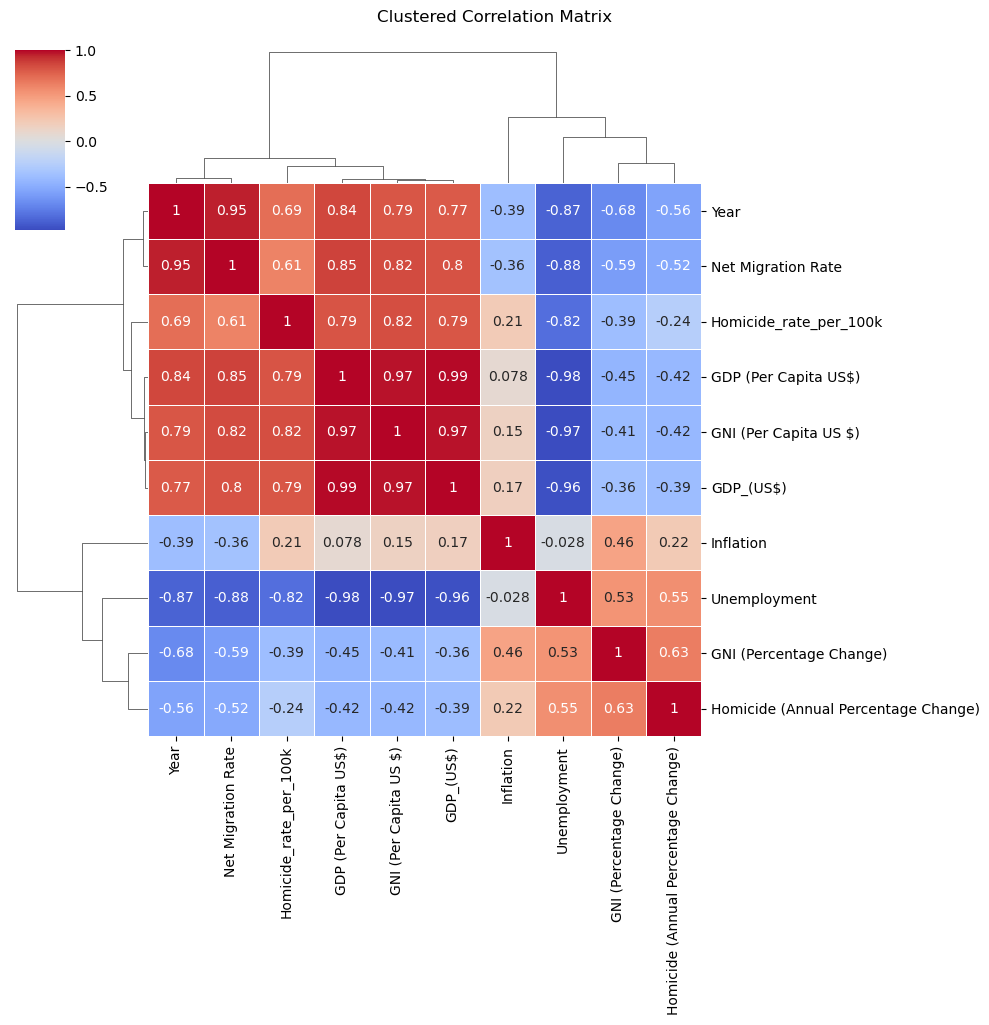

,Year,GDP (Per Capita US$),GNI (Per Capita US $),GNI (Percentage Change),Homicide_rate_per_100k,Homicide (Annual Percentage Change),Inflation,Unemployment,Net Migration Rate,GDP_(US$)
0,2000,7586.43,5140,10.54,9.01,25.24,3.555413,12.100,-4.353,8.154342e+09
1,2001,8123.99,5770,12.26,11.28,25.24,5.536653,10.880,-3.811,8.824849e+09
2,2002,8315.50,6420,11.27,12.70,12.62,4.150059,10.390,-3.270,9.008298e+09
3,2003,10505.01,7650,19.16,16.92,33.17,3.811106,10.480,-2.729,1.130546e+10
4,2004,12344.57,9190,20.13,19.10,12.90,3.721549,8.330,-2.750,1.328029e+10
5,2005,14865.93,10590,15.23,28.19,47.60,6.874535,7.950,-2.771,1.598239e+10
6,2006,17116.79,12560,18.60,26.94,-4.43,8.329604,6.270,-2.793,1.836936e+10
7,2007,20207.88,14170,12.82,28.23,4.79,7.894388,5.540,-2.814,2.164162e+10
8,2008,25836.24,16370,15.53,39.27,39.10,12.030345,4.630,-2.835,2.787159e+10
9,2009,17908.72,15270,-6.72,36.18,-7.87,6.978087,5.280,-2.387,1.917217e+10


In [115]:
# Filter data to include only rows where 'Year' is less than or equal to 2020
filtered_df = soc_info_07[soc_info_07['Year'] <= 2020]

# Select only numeric features
numeric_df = filtered_df.select_dtypes(include='number')
numeric_df = numeric_df.dropna(axis=1)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Replace NaN or infinite values in the correlation matrix
corr_matrix = corr_matrix.fillna(0)  # Replace NaN with 0
corr_matrix = corr_matrix.replace([float('inf'), -float('inf')], 0)  # Replace infinite values with 0

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(10, 10), linewidths=0.5)
plt.suptitle("Clustered Correlation Matrix", y=1.02)
plt.show()
numeric_df

In [116]:
constituency_list = [
    'ARIMA', 'AROUCA/MALONEY', 'BARATARIA/SAN JUAN', 'CARONI CENTRAL', 'CARONI EAST',
    'CHAGUANAS EAST', 'CHAGUANAS WEST', 'COUVA NORTH', 'COUVA SOUTH', 'CUMUTO/MANZANILLA',
    "D'ABADIE/O'MEARA", 'DIEGO MARTIN CENTRAL', 'DIEGO MARTIN NORTH/EAST', 'DIEGO MARTIN WEST',
    'FYZABAD', 'LA BREA', 'LA HORQUETTA/TALPARO', 'LAVENTILLE EAST/MORVANT', 'LAVENTILLE WEST',
    'LOPINOT/BON AIR WEST', 'MAYARO', 'MORUGA/TABLELAND', 'NAPARIMA', 'OROPOUCHE EAST',
    'OROPOUCHE WEST', 'POINT FORTIN', 'POINTE-A-PIERRE', "PORT-OF-SPAIN NORTH/ST. ANN'S WEST",
    'PORT-OF-SPAIN SOUTH', 'PRINCES TOWN', 'SAN FERNANDO EAST', 'SAN FERNANDO WEST', 'SIPARIA',
    "ST. ANN'S EAST", 'ST. AUGUSTINE', 'ST. JOSEPH', 'TABAQUITE', 'TOBAGO EAST', 'TOBAGO WEST',
    'TOCO/SANGRE GRANDE', 'TUNAPUNA', 'TOTAL'
]

# Repeat the constituency list
repeated_constituencies = constituency_list * 5  # because you said repeat 5 times

master_df['CONSTITUENCIES'] = repeated_constituencies

cols = ['CONSTITUENCIES'] + [col for col in master_df.columns if col != 'CONSTITUENCIES']
master_df = master_df[cols]
master_df.to_csv(r"csvs/master_df_2025.csv", index=False)

EDA of electoral Data

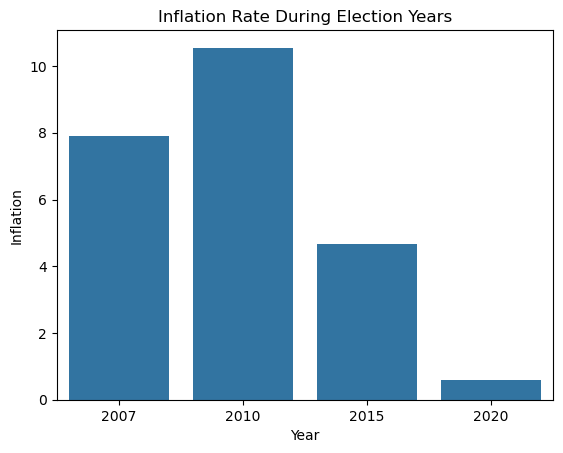

In [117]:
# Filter data to include only rows where 'Year' is less than or equal to 2020
filtered_df = master_df[master_df['Year'] <= 2020]

#GDP vs Inflation
sns.barplot(x='Year', y='Inflation', data=filtered_df)
plt.title('Inflation Rate During Election Years')
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.show()


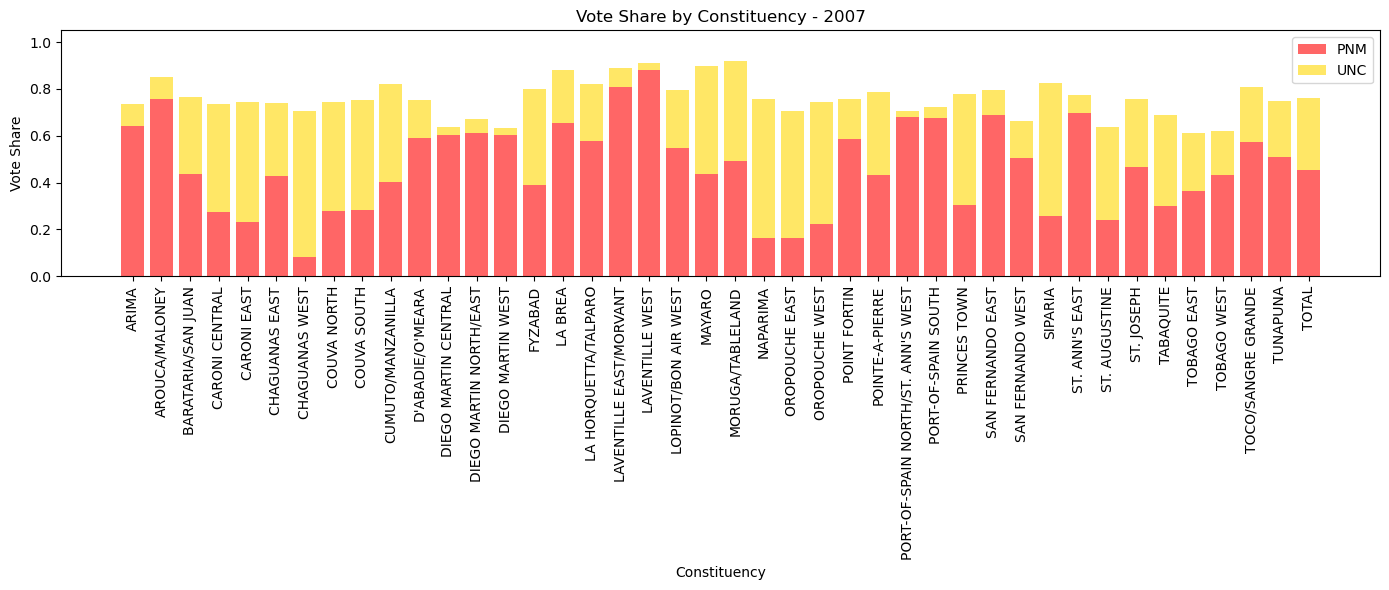

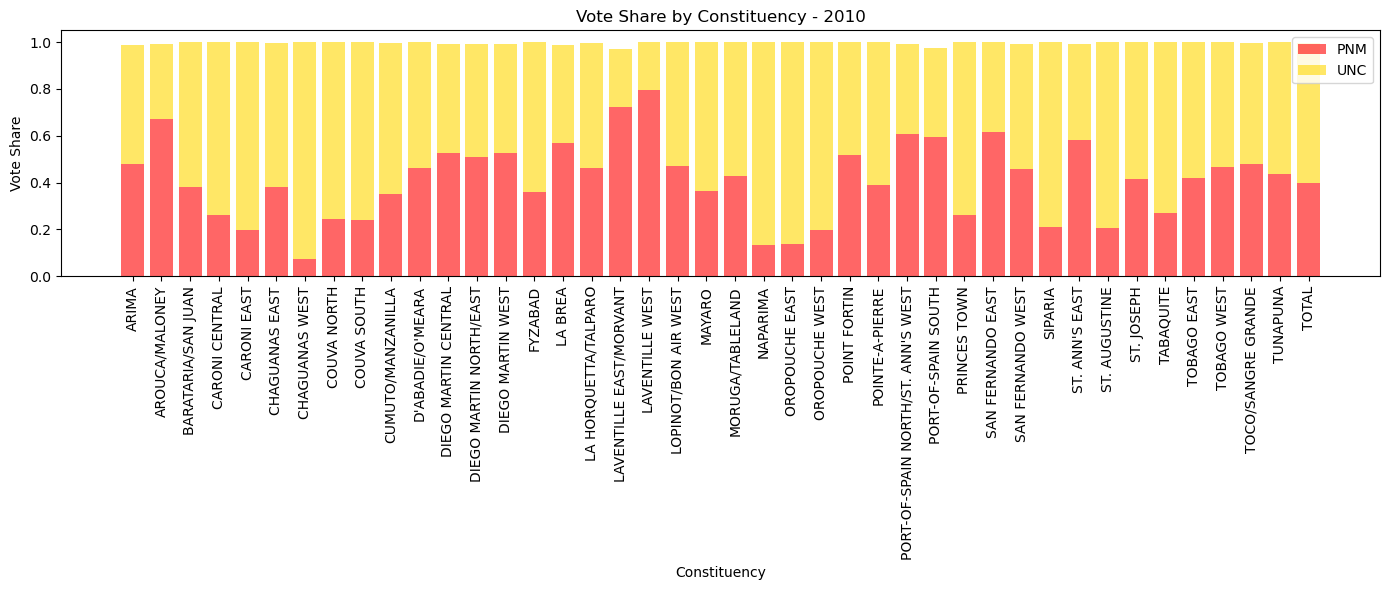

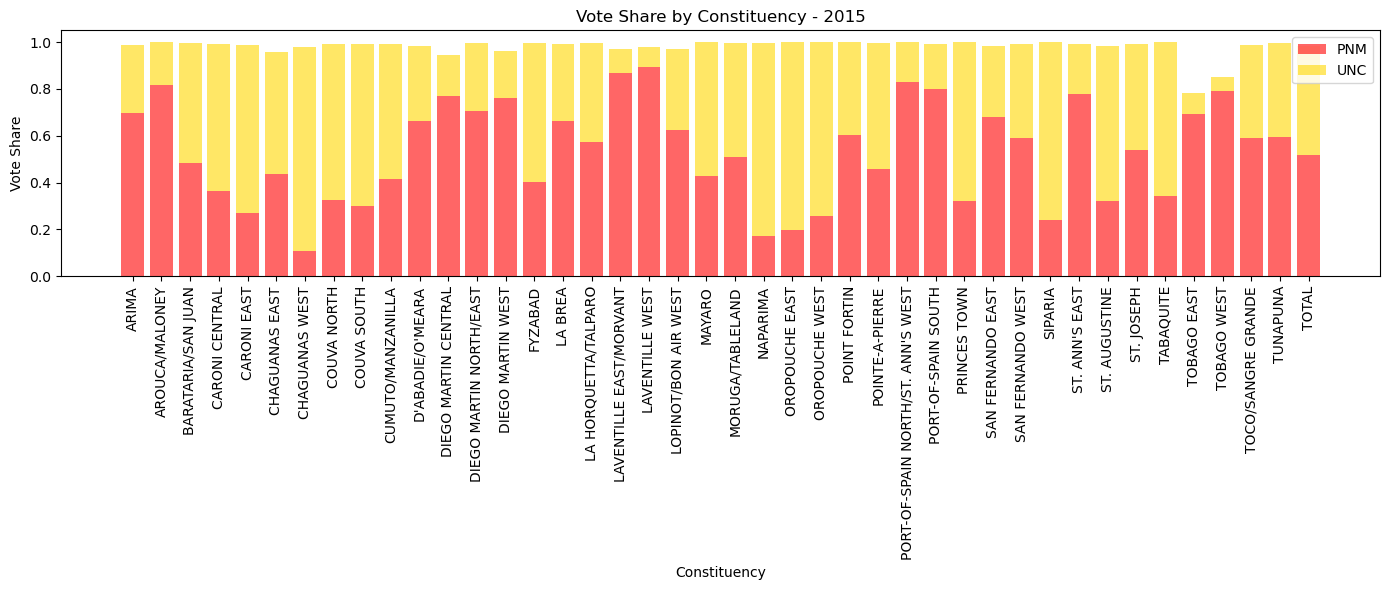

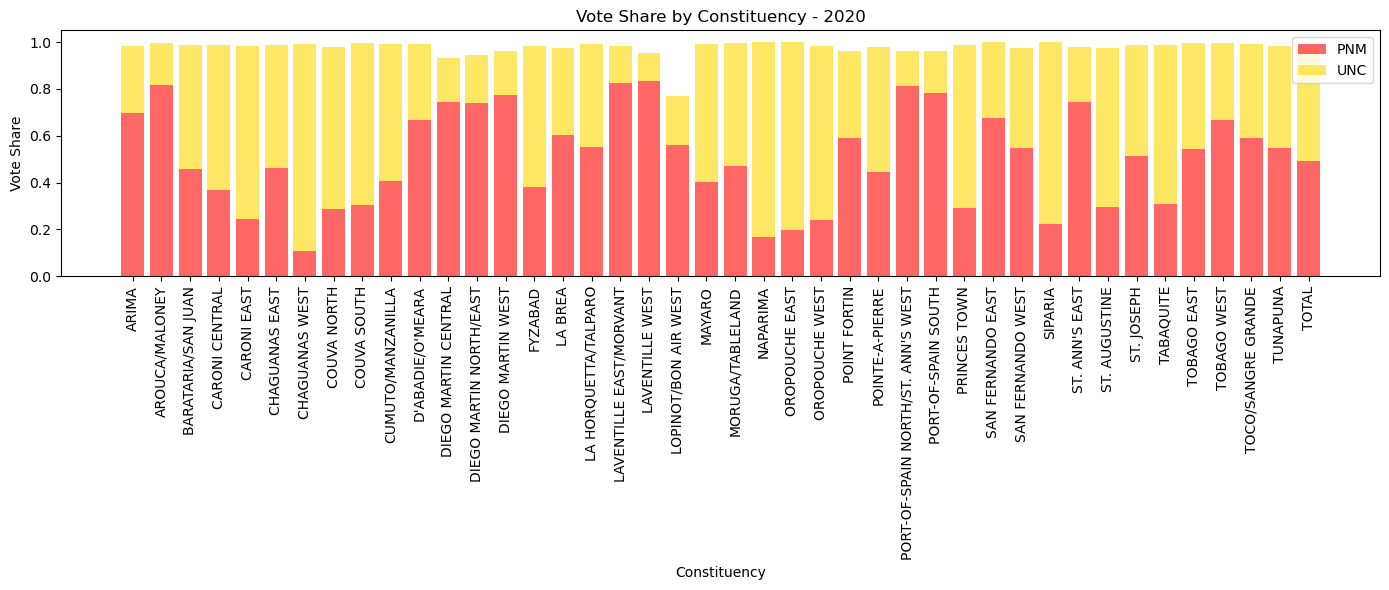

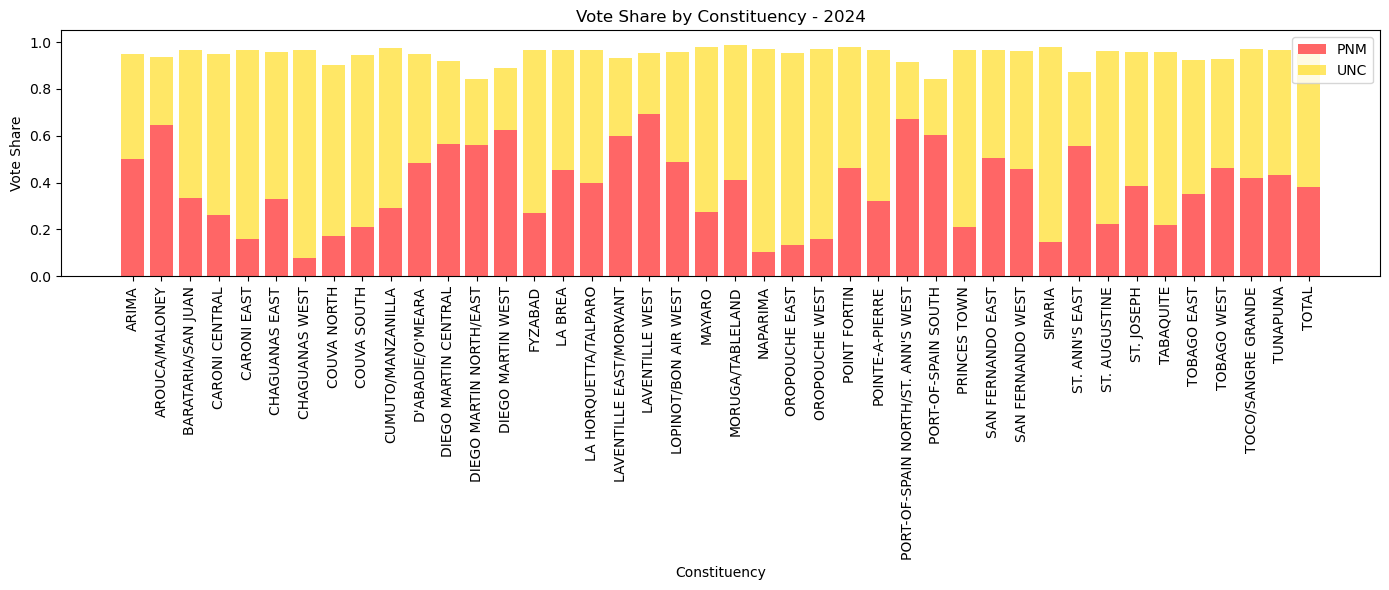

In [118]:
# Ensure constituencies are sorted consistently
master_df_sorted = master_df.sort_values(by=['Year', 'CONSTITUENCIES'])

years = sorted(master_df['Year'].unique())

for year in years:
    subset = master_df[master_df['Year'] == year]

    plt.figure(figsize=(14, 6))
    x = subset['CONSTITUENCIES']

    plt.bar(x, subset['P.N.M._VOTES_%'], label='PNM', color='red', alpha=0.6)
    plt.bar(x, subset['U.N.C._VOTES_%'], label='UNC', color='gold', alpha=0.6, bottom=subset['P.N.M._VOTES_%'])

    plt.xticks(rotation=90)
    plt.title(f'Vote Share by Constituency - {year}')
    plt.xlabel('Constituency')
    plt.ylabel('Vote Share')
    plt.ylim(0, 1.05)
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\zidti\AppData\Local\Temp\ipykernel_9720\89223020.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_constituencies)


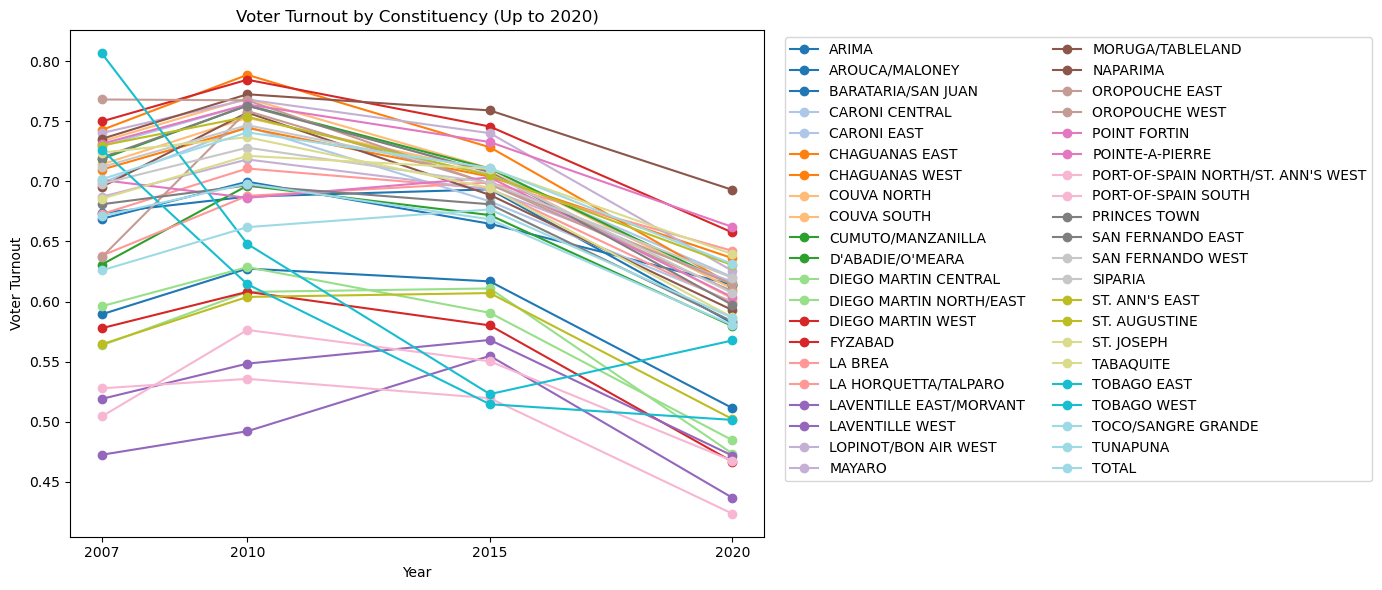

In [119]:
# Filter data
turnout_df = master_df[master_df['Year'] <= 2020].copy()

# Normalize if needed
if turnout_df['VOTER_TURNOUT'].max() > 1:
    turnout_df['VOTER_TURNOUT'] = turnout_df['VOTER_TURNOUT'] / 100

# Use matplotlib's color cycle for more colors
import matplotlib.cm as cm
import numpy as np

unique_constituencies = turnout_df['CONSTITUENCIES'].unique()
num_constituencies = len(unique_constituencies)

# Generate distinct colors using matplotlib's tab20 colormap
colors = cm.get_cmap('tab20', num_constituencies)

plt.figure(figsize=(14, 6))

for i, constituency in enumerate(unique_constituencies):
    df = turnout_df[turnout_df['CONSTITUENCIES'] == constituency]
    plt.plot(df['Year'], df['VOTER_TURNOUT'], label=constituency, color=colors(i), marker='o')

plt.title('Voter Turnout by Constituency (Up to 2020)')
plt.ylabel('Voter Turnout')
plt.xlabel('Year')
plt.xticks(sorted(turnout_df['Year'].unique()))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


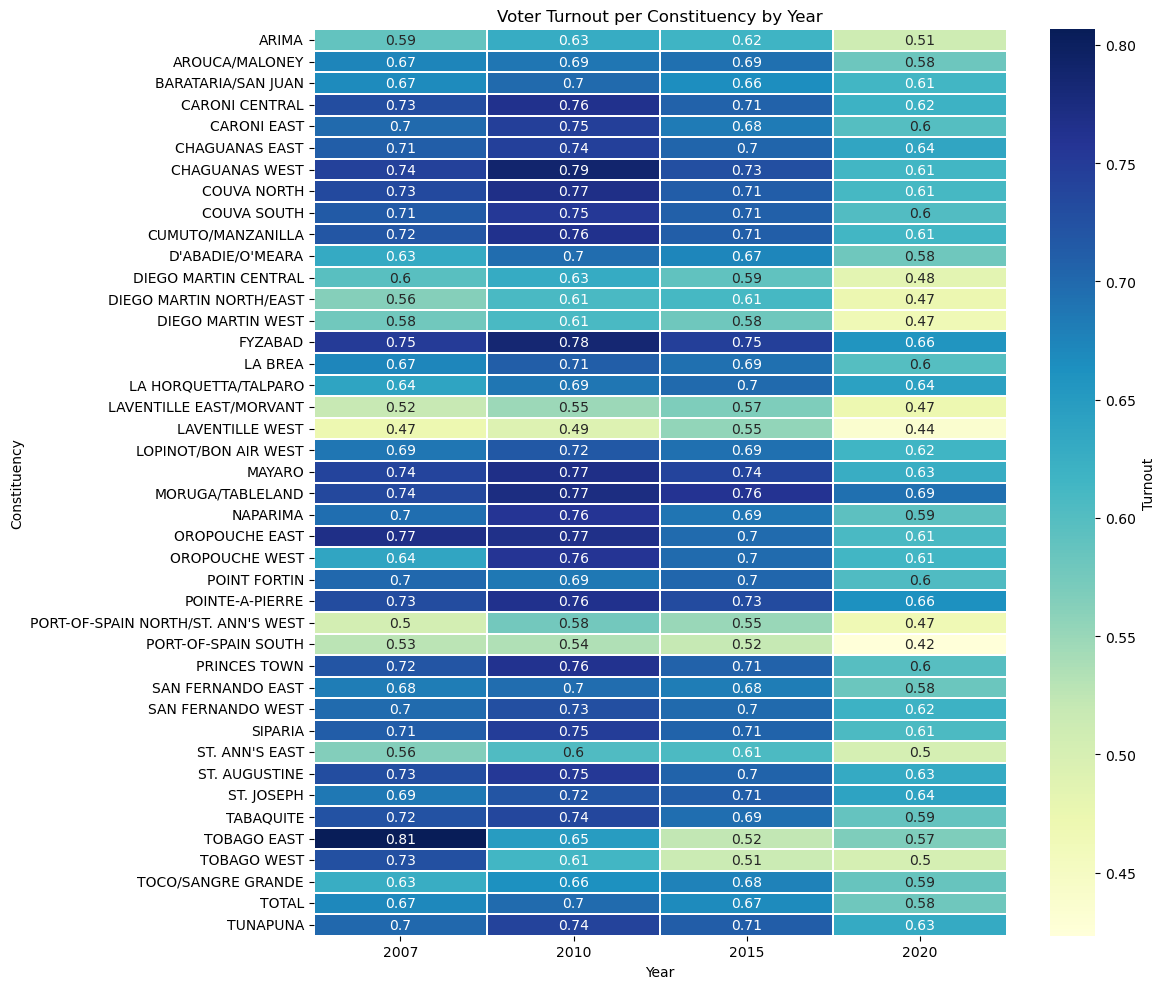

In [120]:
# Pivot to get years as columns, constituencies as rows
heatmap_data = turnout_df.pivot(index='CONSTITUENCIES', columns='Year', values='VOTER_TURNOUT')

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.3, cbar_kws={'label': 'Turnout'})
plt.title('Voter Turnout per Constituency by Year')
plt.xlabel('Year')
plt.ylabel('Constituency')
plt.tight_layout()
plt.show()
